## Carga y Exploración de Datos

### Carga de datos

In [1]:
import pandas as pd
df = pd.read_excel(
    '/content/drive/MyDrive/0. B/2021 - 2022 - 2023/z Machine Learning En Espanol/2023/Operación/Proyectos/Proyectos Activos 2023/Terminados/Jair - OpenCV - 2023 y 2025/2025/0. TFM/datos/datos_nuevos.xlsx'
)
df.head(2)


,Incrementos,Pozo,fecha cambio,Formacion,Unidad,Porosidad,Permeabilidad,Profundidad OWC,Gr,VCL,...,Water Cum,Ocum 500,Water cum 500,Ocum 1000,Water cum 1000,Arena Evaluacion,DD despues,Decline reservas,b reservas,Bueno 1/ Malo 0/ Regular 2
0,1.000000,LY-047,2020-07-26,C5,C5dA,0.100000,155.0,-6784.000000,75.0,0.4,...,25383.0,-132188.750695,240449.0,1105989.0,16019466.0,C5DA,113.797566,0.23,0,1
1,1.913216,LY-047,2022-01-14,C5,C5dA,0.100688,155.0,-6781.693115,75.0,0.4,...,76952.0,461460.000000,240449.0,1134682.0,16317249.0,C5DA,200.000000,0.23,0,1


### Exploración de datos

####1️⃣ Características geológicas / del reservorio

* Formación y Unidad: identifica la estratigrafía y unidades del yacimiento; puedes hacer un conteo por formación y unidad para ver cuáles son más representativas.

* Porosidad y Permeabilidad: resumen estadístico (media, mediana, rango) para caracterizar la capacidad de almacenamiento y flujo del yacimiento.

* Profundidad OWC: permite describir la posición del contacto agua-aceite y la extensión vertical del acuífero activo.

* Gr y VCL: composición de grano y arcilla; útil para inferir heterogeneidad y potencial de producción.

* Espesor ft: espesor neto del reservorio; describe la volumetría disponible para extracción.

* XRES y Forma arena: heterogeneidad espacial y tipo de arena; impacta la eficiencia de producción.

* Arena Evaluación: calidad de arena; puede resumirse como porcentaje de arenas buenas vs malas.

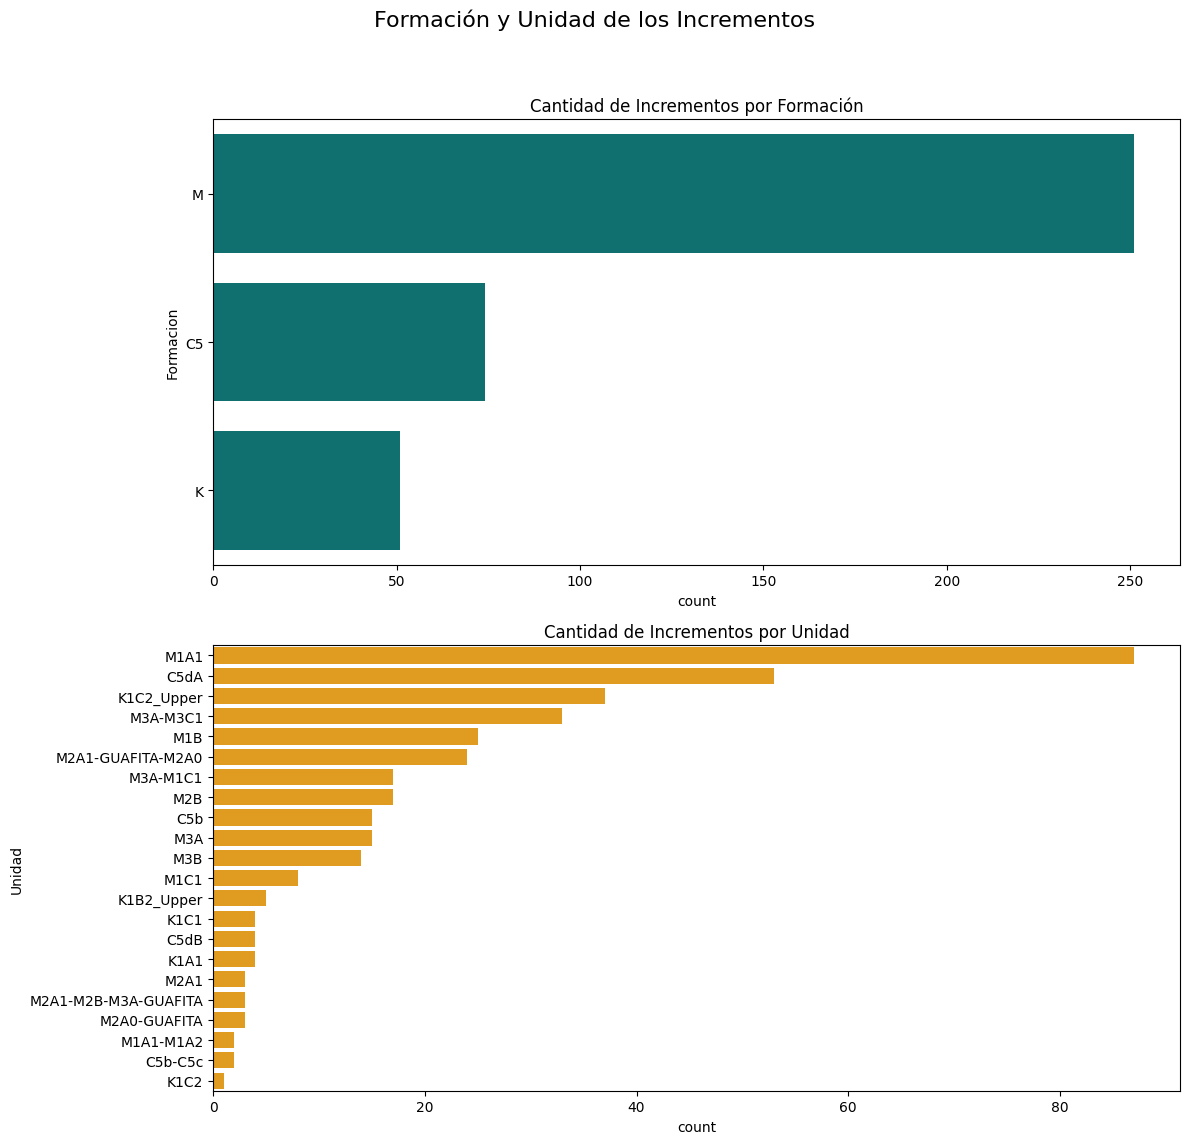

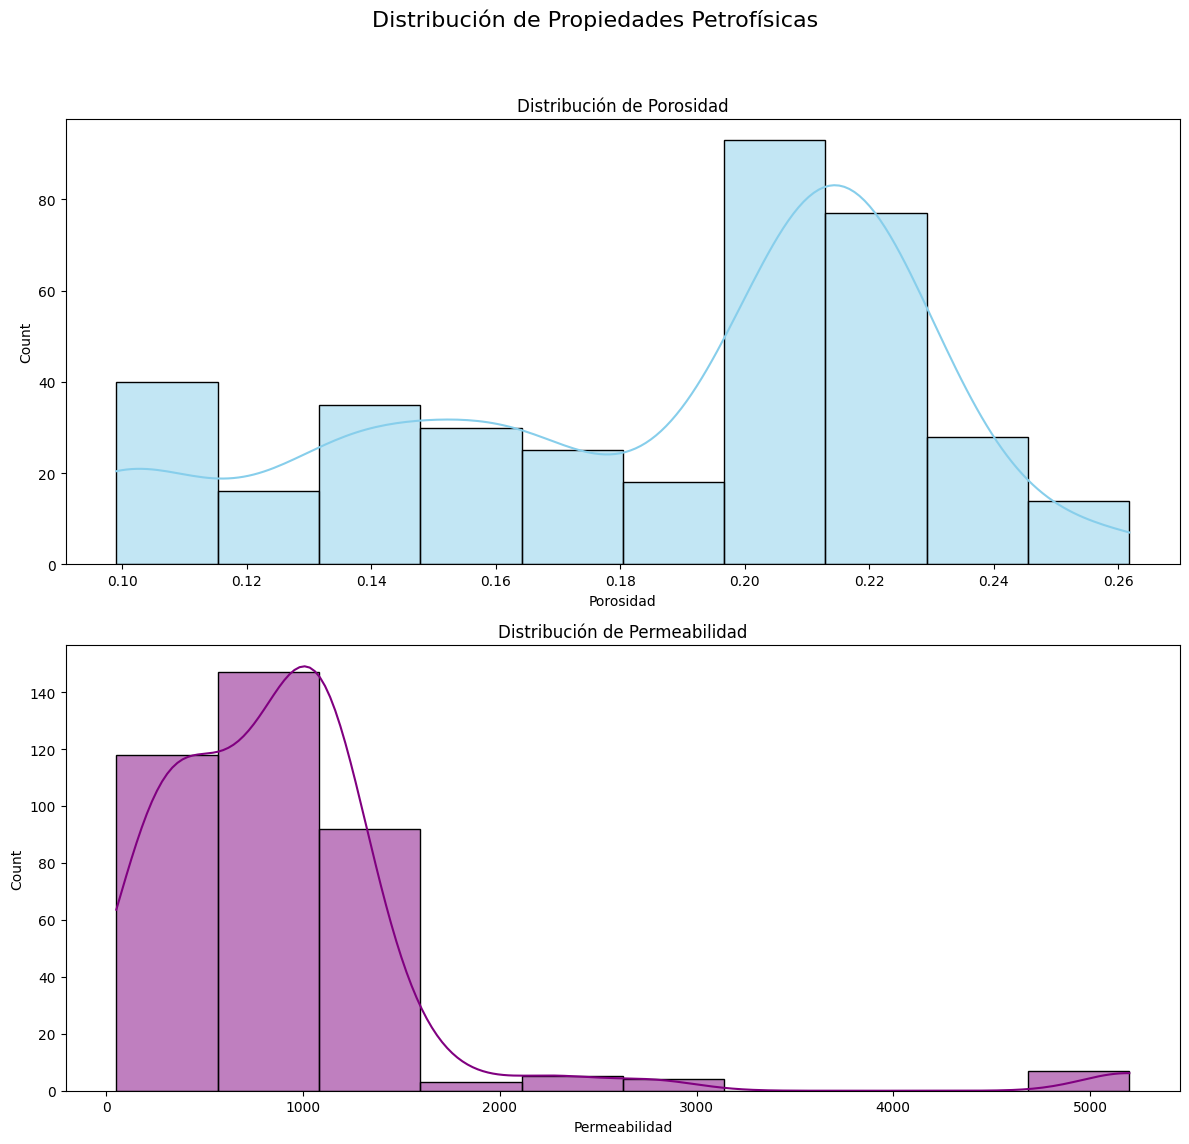

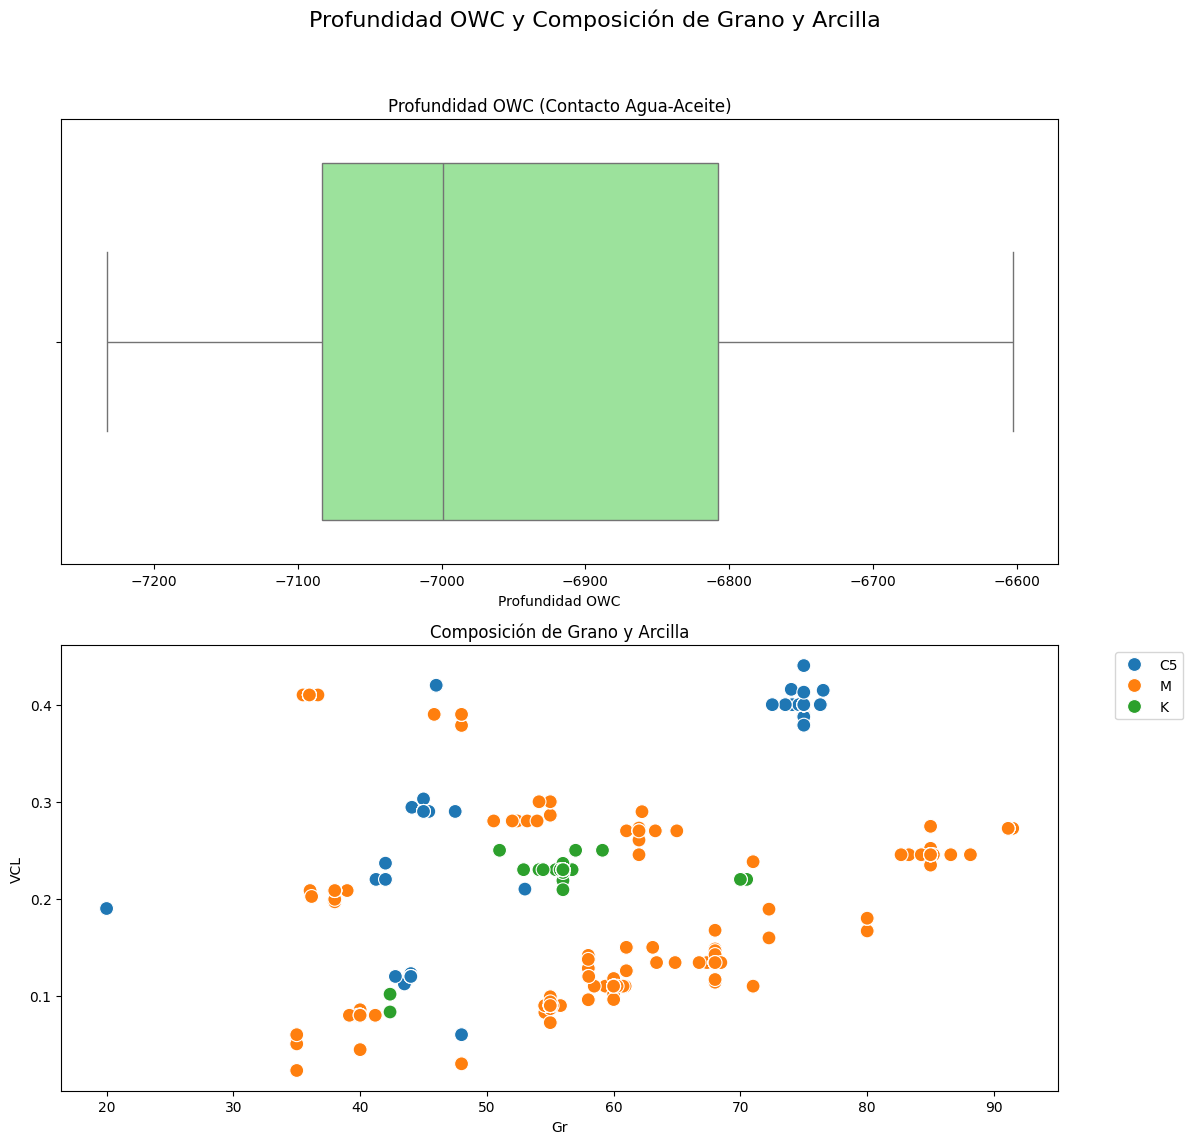

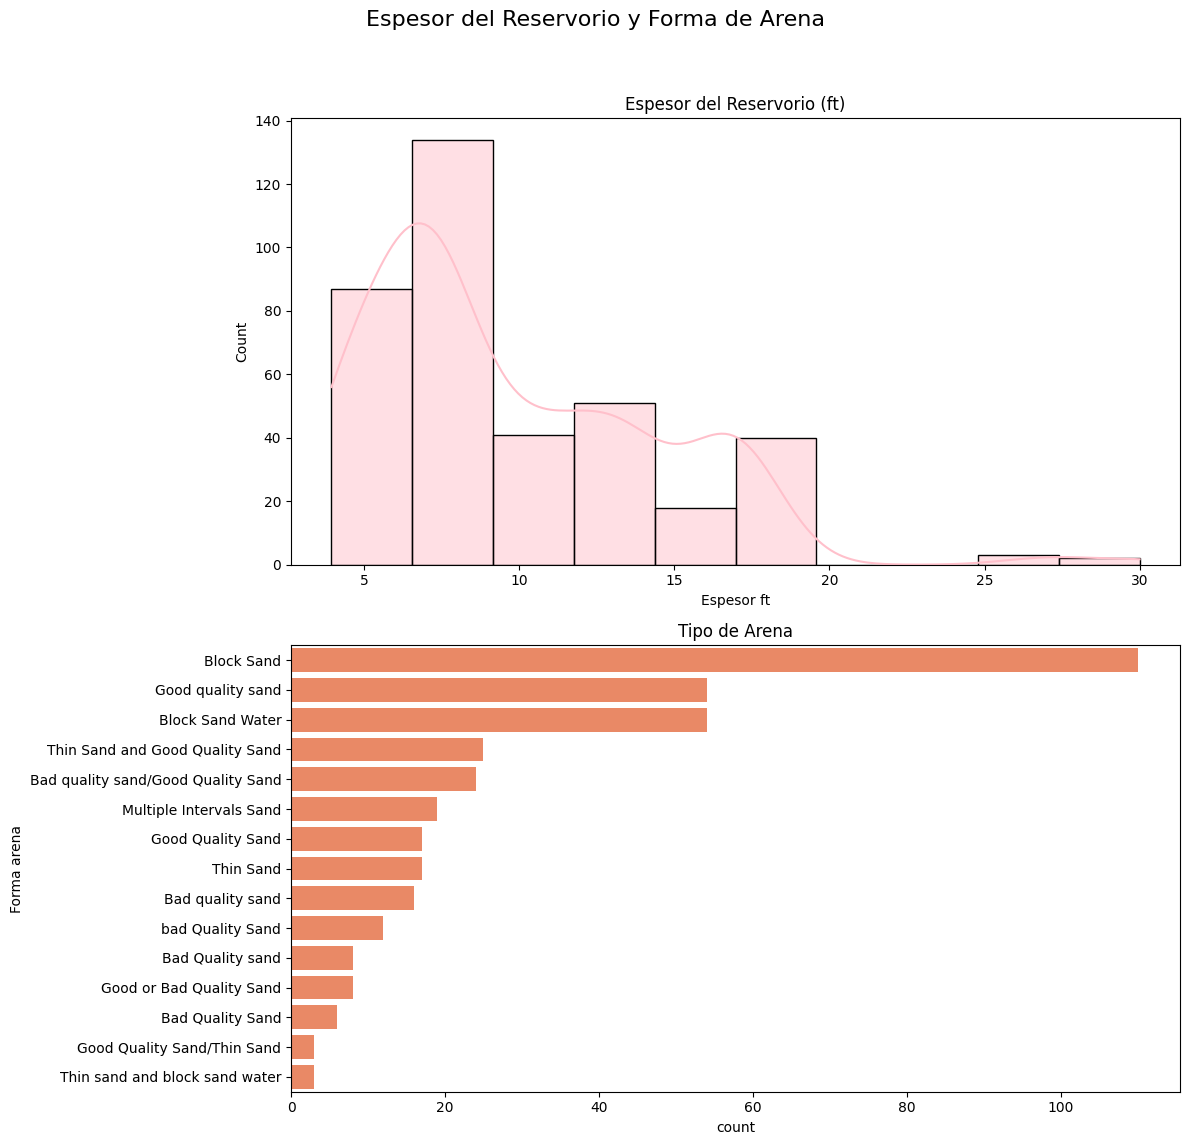

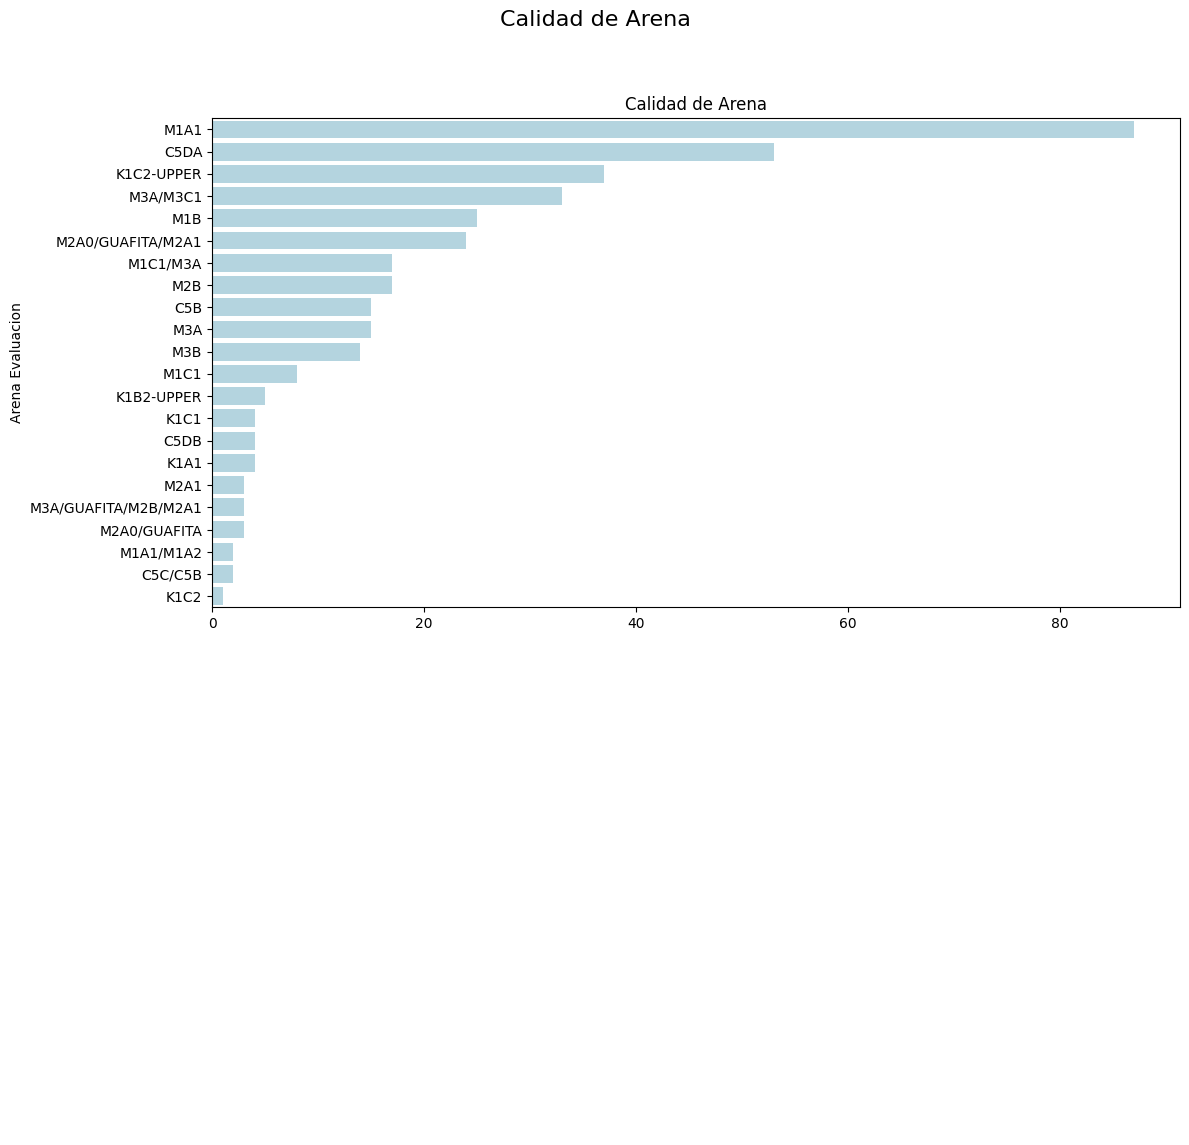

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de configuraciones de gráficos: (tipo, columnas, título, color/palette)
plots = [
    ('countplot', 'Formacion', 'Cantidad de Incrementos por Formación', 'teal'),
    ('countplot', 'Unidad', 'Cantidad de Incrementos por Unidad', 'orange'),
    ('histplot', 'Porosidad', 'Distribución de Porosidad', 'skyblue'),
    ('histplot', 'Permeabilidad', 'Distribución de Permeabilidad', 'purple'),
    ('boxplot', 'Profundidad OWC', 'Profundidad OWC (Contacto Agua-Aceite)', 'lightgreen'),
    ('scatter', ('Gr','VCL'), 'Composición de Grano y Arcilla', 'tab10'),
    ('histplot', 'Espesor ft', 'Espesor del Reservorio (ft)', 'pink'),
    ('countplot', 'Forma arena', 'Tipo de Arena', 'coral'),
    ('barplot', 'Arena Evaluacion', 'Calidad de Arena', 'lightblue')
]

# Títulos de las figuras según los gráficos que contienen
figure_titles = [
    'Formación y Unidad de los Incrementos',
    'Distribución de Propiedades Petrofísicas',
    'Profundidad OWC y Composición de Grano y Arcilla',
    'Espesor del Reservorio y Forma de Arena',
    'Calidad de Arena'
]

# Función para crear figuras con 2 gráficos en columna
def plot_two_by_two(plots_subset, df, fig_title):
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))  # 2 filas, 1 columna
    plt.suptitle(fig_title, fontsize=16)

    for i, (ptype, col, title, color) in enumerate(plots_subset):
        ax = axes[i]
        if ptype == 'countplot':
            sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax, color=color)
        elif ptype == 'histplot':
            sns.histplot(df[col], bins=10, kde=True, ax=ax, color=color)
        elif ptype == 'boxplot':
            sns.boxplot(x=col, data=df, ax=ax, color=color)
        elif ptype == 'scatter':
            sns.scatterplot(x=col[0], y=col[1], hue='Formacion', data=df, ax=ax, palette=color, s=100)
            ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')
        elif ptype == 'barplot':
            counts = df[col].value_counts()
            sns.barplot(x=counts.values, y=counts.index, ax=ax, color=color)
        ax.set_title(title)

    # Si solo hay un gráfico en la figura, se oculta el segundo eje
    if len(plots_subset) == 1:
        axes[1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Crear las figuras
for i in range(0, len(plots), 2):
    subset = plots[i:i+2]
    fig_title = figure_titles[i//2]  # Título específico
    plot_two_by_two(subset, df, fig_title)


####2️⃣ Producción histórica / desempeño

* BOPD PRE / BOPD POST: producción de aceite antes y después del incremento.

* BWPD PRE / BWPD POST: producción de agua antes y después del incremento.

* BSW pre / post / NV: contenido de agua en el yacimiento; indicador de eficiencia y avance del acuífero.

* Rate antes / Rate después: tasas de producción normalizadas.

* Ocum / Water Cum / Ocum 500 / Water cum 500 / Ocum 1000 / Water cum 1000: producción acumulada de aceite y agua; permiten resumir el desempeño histórico por períodos.

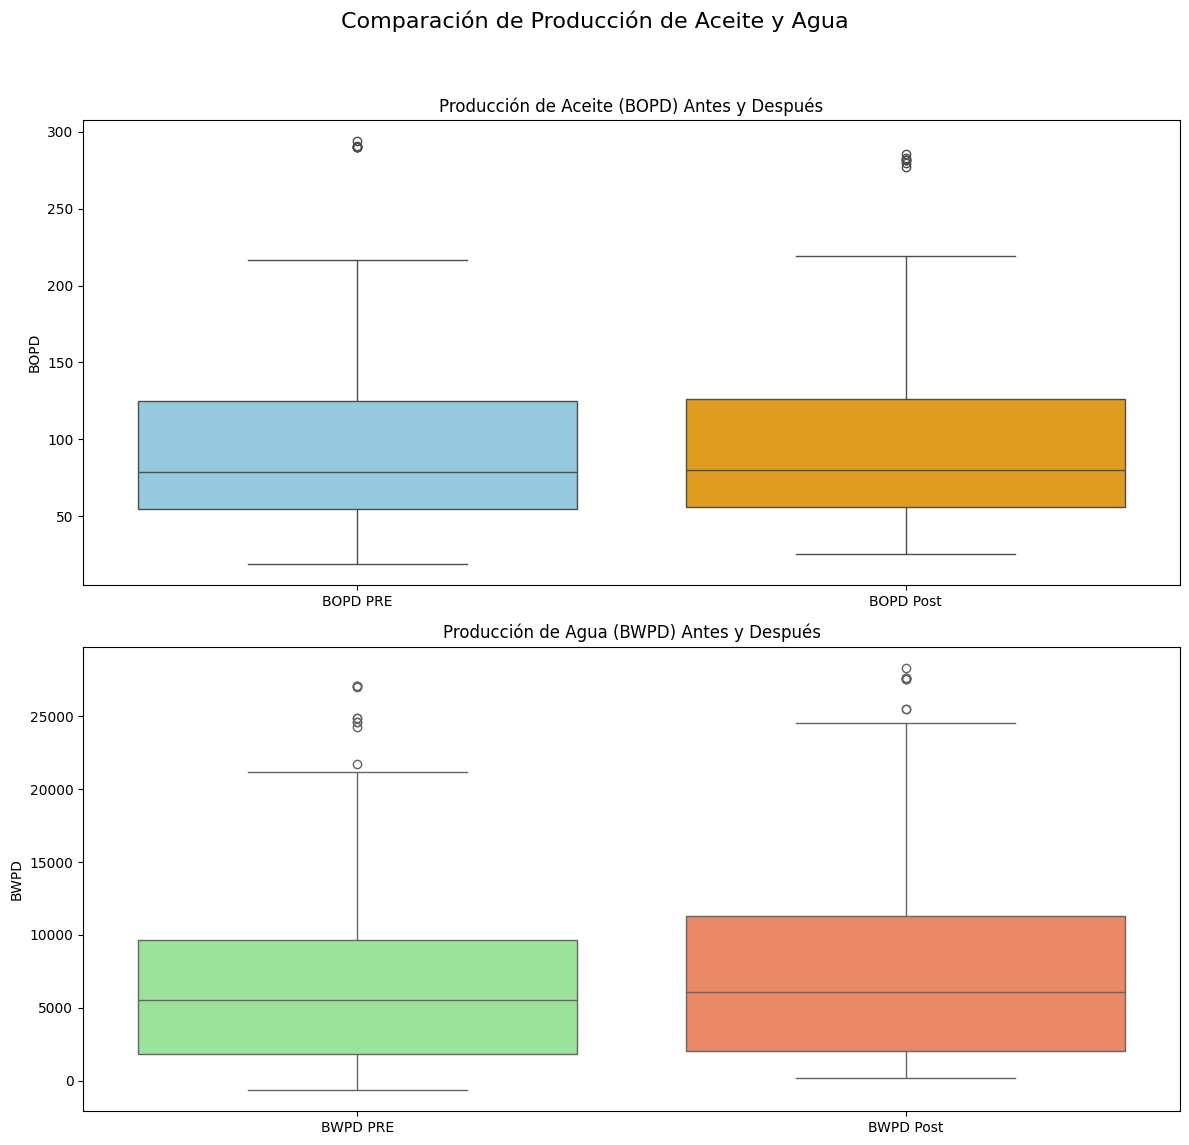

/tmp/ipython-input-2878025717.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Pre', 'Post', 'Pre NV'])


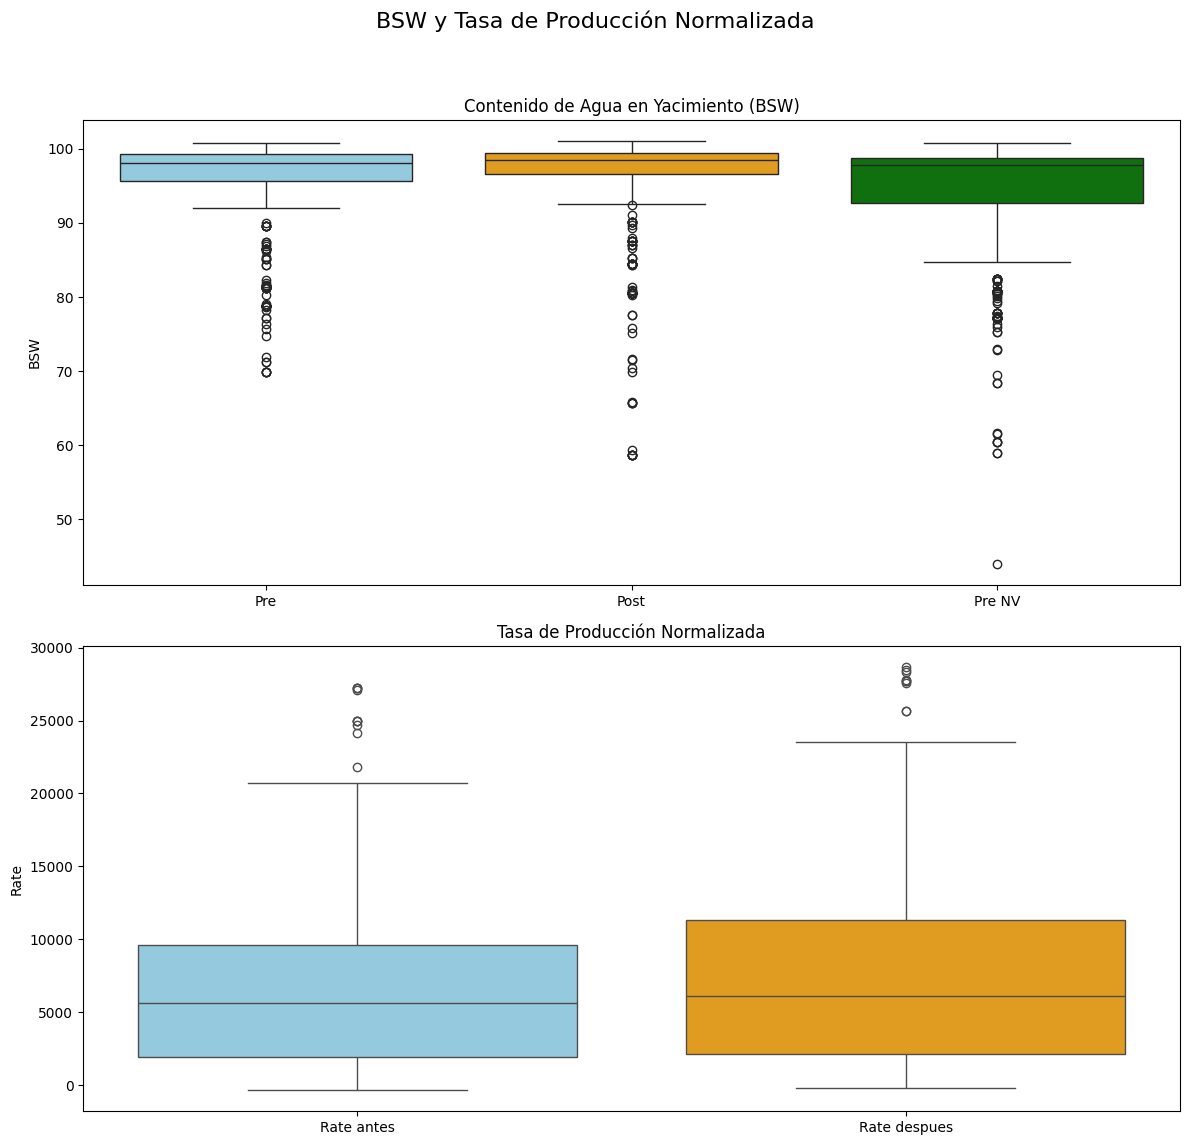

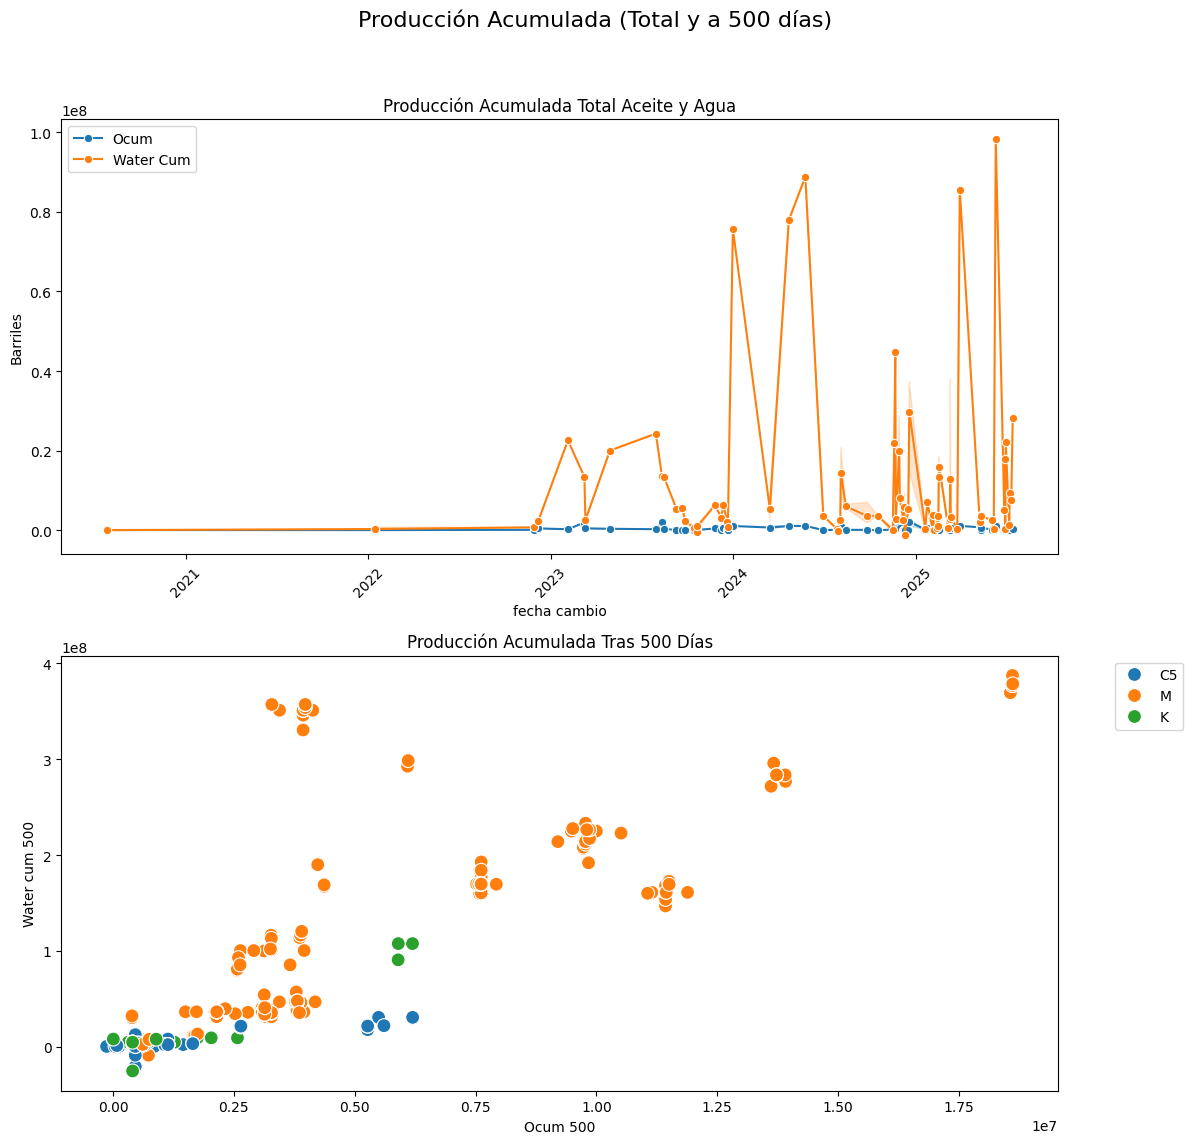

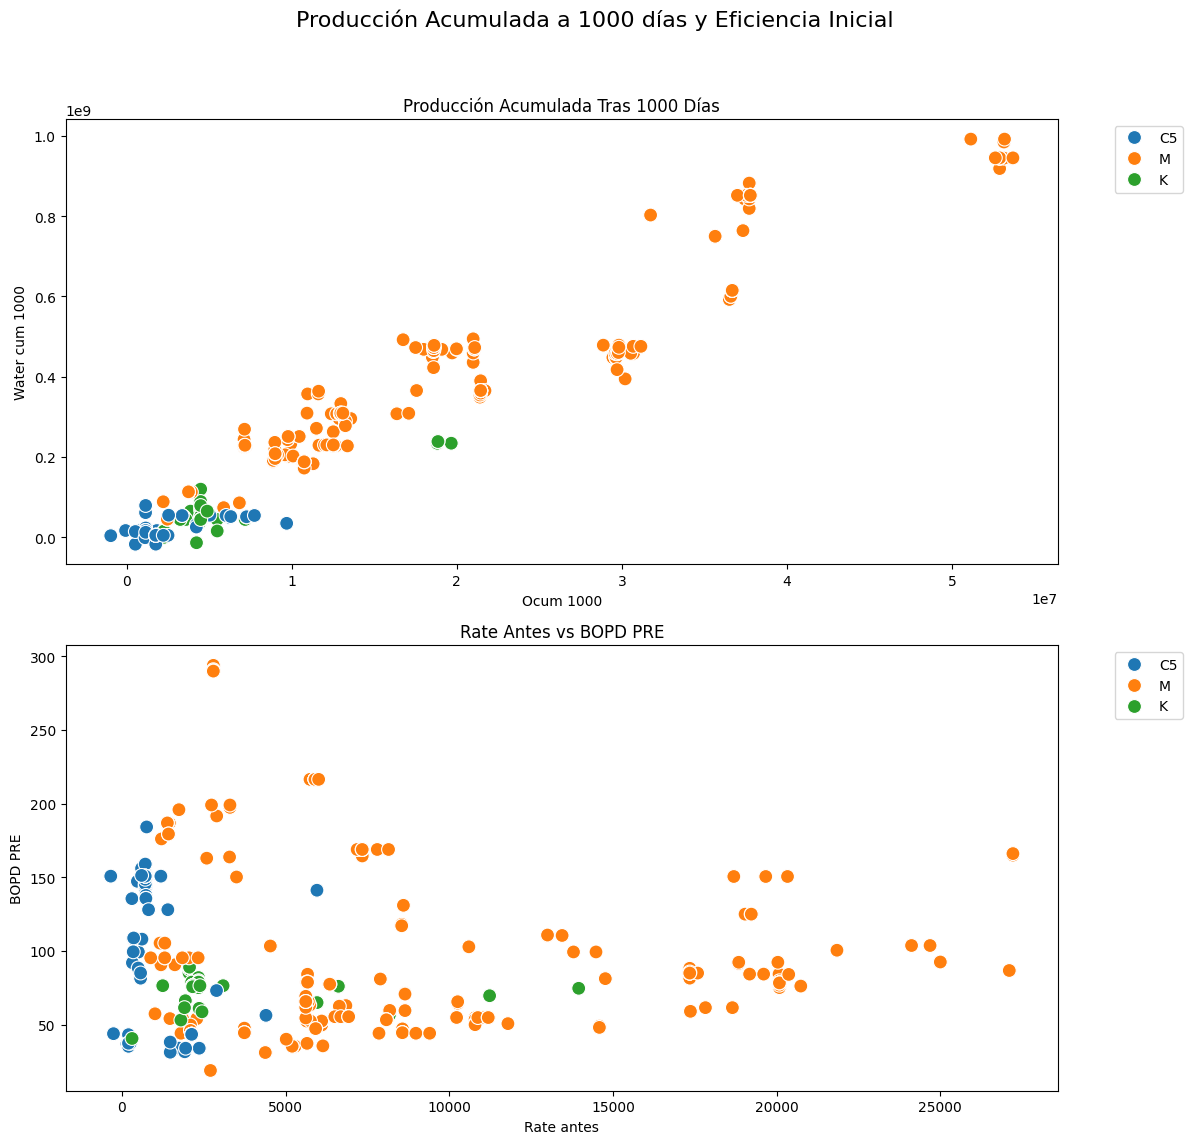

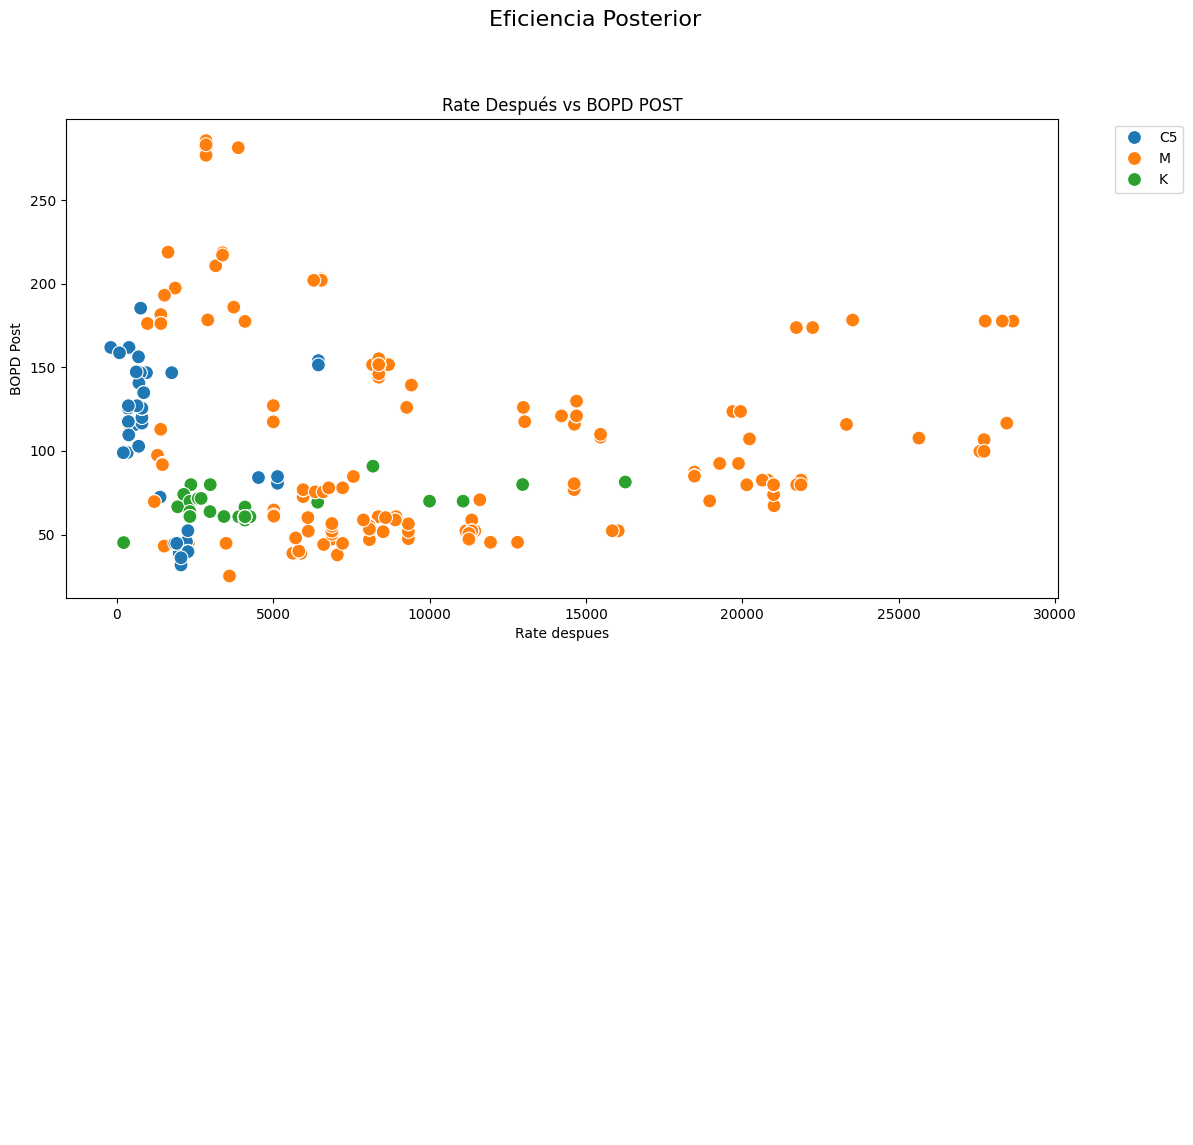

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de configuraciones de gráficos: (tipo, columnas, título, colores/palette)
plots = [
    ('boxplot_multi', ['BOPD PRE','BOPD Post'], 'Producción de Aceite (BOPD) Antes y Después', ['skyblue','orange']),
    ('boxplot_multi', ['BWPD PRE','BWPD Post'], 'Producción de Agua (BWPD) Antes y Después', ['lightgreen','coral']),
    ('boxplot_multi', ['BSW pre - validado','BSW Post validado','BSW Pre NV'], 'Contenido de Agua en Yacimiento (BSW)', ['skyblue','orange','green']),
    ('boxplot_multi', ['Rate antes','Rate despues'], 'Tasa de Producción Normalizada', ['skyblue','orange']),
    ('lineplot', ['fecha cambio','Ocum','Water Cum'], 'Producción Acumulada Total Aceite y Agua', None),
    ('scatter', ['Ocum 500','Water cum 500'], 'Producción Acumulada Tras 500 Días', 'tab10'),
    ('scatter', ['Ocum 1000','Water cum 1000'], 'Producción Acumulada Tras 1000 Días', 'tab10'),
    ('scatter', ['Rate antes','BOPD PRE'], 'Rate Antes vs BOPD PRE', 'tab10'),
    ('scatter', ['Rate despues','BOPD Post'], 'Rate Después vs BOPD POST', 'tab10')
]

# Títulos de figuras (según pares de gráficos)
figure_titles = [
    'Comparación de Producción de Aceite y Agua',
    'BSW y Tasa de Producción Normalizada',
    'Producción Acumulada (Total y a 500 días)',
    'Producción Acumulada a 1000 días y Eficiencia Inicial',
    'Eficiencia Posterior'
]

# Función para crear figuras con 2 gráficos en columna
def plot_two_by_two(plots_subset, df, fig_title):
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    plt.suptitle(fig_title, fontsize=16)

    for i, (ptype, cols, title, color) in enumerate(plots_subset):
        ax = axes[i]
        if ptype == 'boxplot_multi':
            sns.boxplot(data=df[cols], ax=ax, palette=color)
            ax.set_title(title)
            ax.set_ylabel(cols[0].split()[0])
            if len(cols) == 3:  # caso especial para BSW
                ax.set_xticklabels(['Pre', 'Post', 'Pre NV'])
        elif ptype == 'lineplot':
            df_sorted = df.sort_values(cols[0])
            sns.lineplot(x=cols[0], y=cols[1], data=df_sorted, ax=ax, marker='o', label=cols[1])
            sns.lineplot(x=cols[0], y=cols[2], data=df_sorted, ax=ax, marker='o', label=cols[2])
            ax.set_title(title)
            ax.set_ylabel('Barriles')
            ax.legend()
            ax.tick_params(axis='x', rotation=45)
        elif ptype == 'scatter':
            sns.scatterplot(x=cols[0], y=cols[1], hue='Formacion', data=df, ax=ax, palette=color, s=100)
            ax.set_title(title)
            ax.set_xlabel(cols[0])
            ax.set_ylabel(cols[1])
            ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')

    # Si solo hay un gráfico en la figura, se oculta el segundo eje
    if len(plots_subset) == 1:
        axes[1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Crear las figuras (2 gráficos en columna por figura)
for i in range(0, len(plots), 2):
    subset = plots[i:i+2]
    fig_title = figure_titles[i//2]
    plot_two_by_two(subset, df, fig_title)


####Otras gráficas

In [28]:
import pandas as pd

# Asegurarse que la columna fecha sea datetime
df['fecha cambio'] = pd.to_datetime(df['fecha cambio'], dayfirst=True, errors='coerce')

print("===== RESUMEN DEL DATASET =====\n")

# Rango de fechas
fecha_min = df['fecha cambio'].min()
fecha_max = df['fecha cambio'].max()
print(f"Rango de fechas: {fecha_min.date()} a {fecha_max.date()}")

# Cantidad de pozos únicos
cantidad_pozos = df['Pozo'].nunique()
print(f"Cantidad de pozos: {cantidad_pozos}")

# Rango de incrementos
incrementos_min = df['Incrementos'].min()
incrementos_max = df['Incrementos'].max()
print(f"Rango de incrementos: {incrementos_min} a {incrementos_max}")

# Estadísticas de propiedades de formación/reservorio
print("\n--- Propiedades del reservorio ---")
propiedades = ['Porosidad','Permeabilidad','Profundidad OWC','Gr','VCL','Espesor ft']
for col in propiedades:
    if col in df.columns:
        print(f"{col}: min={df[col].min():.3f}, max={df[col].max():.3f}, mean={df[col].mean():.3f}")

# Conteo de formaciones y unidades
print("\nConteo de formaciones y unidades:")
print(df.groupby('Formacion')['Unidad'].nunique())

# Estadísticas de producción BOPD y BWPD
print("\n--- Producción de aceite y agua ---")
produccion_cols = ['BOPD PRE','BOPD Post','BWPD PRE','BWPD Post']
for col in produccion_cols:
    if col in df.columns:
        print(f"{col}: min={df[col].min():.2f}, max={df[col].max():.2f}, mean={df[col].mean():.2f}")

# Razón aceite/agua pre y post
df['razon_pre'] = df['BOPD PRE'] / df['BWPD PRE']
df['razon_post'] = df['BOPD Post'] / df['BWPD Post']
print("\n--- Razón aceite/agua ---")
print(f"Pre incremento: min={df['razon_pre'].min():.2f}, max={df['razon_pre'].max():.2f}, mean={df['razon_pre'].mean():.2f}")
print(f"Post incremento: min={df['razon_post'].min():.2f}, max={df['razon_post'].max():.2f}, mean={df['razon_post'].mean():.2f}")

# Variable objetivo
target = 'Bueno 1/ Malo 0/ Regular 2'
if target in df.columns:
    print("\n--- Variable objetivo ---")
    print(df[target].value_counts())


===== RESUMEN DEL DATASET =====

Rango de fechas: 2020-07-26 a 2025-07-13
Cantidad de pozos: 34
Rango de incrementos: 0.6772904276499149 a 8.0

--- Propiedades del reservorio ---
Porosidad: min=0.099, max=0.262, mean=0.185
Permeabilidad: min=50.820, max=5200.000, mean=894.301
Profundidad OWC: min=-7232.813, max=-6603.000, mean=-6967.607
Gr: min=20.000, max=91.483, mean=58.620
VCL: min=0.023, max=0.440, mean=0.217
Espesor ft: min=3.940, max=30.000, mean=9.744

Conteo de formaciones y unidades:
Formacion
C5     4
K      5
M     13
Name: Unidad, dtype: int64

--- Producción de aceite y agua ---
BOPD PRE: min=18.93, max=293.72, mean=94.64
BOPD Post: min=25.23, max=285.64, mean=97.15
BWPD PRE: min=-651.26, max=27052.00, mean=6922.46
BWPD Post: min=161.47, max=28338.33, mean=7670.37

--- Razón aceite/agua ---
Pre incremento: min=-0.50, max=2.46, mean=0.06
Post incremento: min=0.00, max=0.91, mean=0.07

--- Variable objetivo ---
Bueno 1/ Malo 0/ Regular 2
1    143
0    129
2    104
Name: coun

In [29]:
# Cuántos pozos hay en el dataset
df['Pozo'].nunique()

34

In [30]:
df.columns

Index(['Incrementos', 'Pozo', 'fecha cambio', 'Formacion', 'Unidad',
       'Porosidad', 'Permeabilidad', 'Profundidad OWC', 'Gr', 'VCL',
       'Espesor ft', 'XRES', 'Forma arena', 'BOPD PRE', 'BWPD PRE',
       'Rate antes', 'BSW pre - validado', 'WOR PRE', 'Presion estatica',
       'IP Antes', 'DD PRE', 'BOPD Post', 'BWPD Post', 'Rate despues',
       'BSW Post validado', 'BSW Pre NV', 'BSW post NV', 'BSW post 3 meses NV',
       'Ocum', 'Water Cum', 'Ocum 500', 'Water cum 500', 'Ocum 1000',
       'Water cum 1000', 'Arena Evaluacion', 'DD despues', 'Decline reservas',
       'b reservas', 'Bueno 1/ Malo 0/ Regular 2', 'razon_pre', 'razon_post'],
      dtype='object')

### Modelado

#### 1.- Preparación de datos

In [5]:
import pandas as pd
df = pd.read_excel(
    '/content/drive/MyDrive/0. B/2021 - 2022 - 2023/z Machine Learning En Espanol/2023/Operación/Proyectos/Proyectos Activos 2023/Terminados/Jair - OpenCV - 2023 y 2025/2025/0. TFM/datos/datos_nuevos.xlsx'
)
df.head(2)


,Incrementos,Pozo,fecha cambio,Formacion,Unidad,Porosidad,Permeabilidad,Profundidad OWC,Gr,VCL,...,Water Cum,Ocum 500,Water cum 500,Ocum 1000,Water cum 1000,Arena Evaluacion,DD despues,Decline reservas,b reservas,Bueno 1/ Malo 0/ Regular 2
0,1.000000,LY-047,2020-07-26,C5,C5dA,0.100000,155.0,-6784.000000,75.0,0.4,...,25383.0,-132188.750695,240449.0,1105989.0,16019466.0,C5DA,113.797566,0.23,0,1
1,1.913216,LY-047,2022-01-14,C5,C5dA,0.100688,155.0,-6781.693115,75.0,0.4,...,76952.0,461460.000000,240449.0,1134682.0,16317249.0,C5DA,200.000000,0.23,0,1


In [6]:
import pandas as pd

# --- 1️⃣ Eliminar registros con valores NaN ---
df_clean = df.dropna().reset_index(drop=True)

# --- 2️⃣ Feature Engineering ---

# Razones y diferencias de producción
df_clean['BOPD_ratio'] = df_clean['BOPD Post'] / df_clean['BOPD PRE']
df_clean['BWPD_ratio'] = df_clean['BWPD Post'] / df_clean['BWPD PRE']
df_clean['delta_BSW'] = df_clean['BSW Post validado'] - df_clean['BSW pre - validado']

# Combinaciones geológicas
df_clean['Porosidad_Permeabilidad'] = df_clean['Porosidad'] * df_clean['Permeabilidad']

# Producción acumulada / tasas
df_clean['Ocum_rate_1000'] = df_clean['Ocum 1000'] / 1
df_clean['Water_rate_1000'] = df_clean['Water cum 1000'] / 1

# Delta rate
df_clean['delta_rate'] = df_clean['Rate despues'] - df_clean['Rate antes']

# --- Nueva variable: Delta Drawdown ---
df_clean['drawdown_delta'] = df_clean['DD despues'] - df_clean['DD PRE']

# --- 3️⃣ Variables finales (DD originales eliminadas) ---
feature_cols = [
    'BOPD_ratio', 'BWPD_ratio', 'delta_BSW',
    'Porosidad_Permeabilidad',
    'Ocum_rate_1000', 'Water_rate_1000',
    'delta_rate', 'drawdown_delta'
]

categorical_cols = ['Formacion','Unidad','Forma arena']

# Target
target_col = 'Bueno 1/ Malo 0/ Regular 2'

# Dataset final listo para modelado
df_model = df_clean[feature_cols + categorical_cols + [target_col]]
df_model = df_model.copy()
df_model['fecha_cambio'] = df['fecha cambio']

print("Dataset limpio y con features seleccionadas (sin DD originales, usando drawdown_delta):")
print(f"Cantidad de registros: {len(df_model)}")
df_model.head(2)


Dataset limpio y con features seleccionadas (sin DD originales, usando drawdown_delta):
Cantidad de registros: 376


,BOPD_ratio,BWPD_ratio,delta_BSW,Porosidad_Permeabilidad,Ocum_rate_1000,Water_rate_1000,delta_rate,drawdown_delta,Formacion,Unidad,Forma arena,Bueno 1/ Malo 0/ Regular 2,fecha_cambio
0,1.956663,1.596348,-3.94,15.50000,1105989.0,16019466.0,1232.208174,-38.202434,C5,C5dA,Block Sand,1,2020-07-26
1,3.748294,1.411411,-22.60,15.60668,1134682.0,16317249.0,192.000000,0.000000,C5,C5dA,Block Sand,1,2022-01-14


In [7]:
# Contar la cantidad de registros por cada valor
conteo = df['Bueno 1/ Malo 0/ Regular 2'].value_counts()

print(conteo)


Bueno 1/ Malo 0/ Regular 2
1    143
0    129
2    104
Name: count, dtype: int64


Split temporal

In [8]:
df_model = df_model.copy()
df_model.loc[:, 'fecha_cambio'] = pd.to_datetime(df_model['fecha_cambio'])

# Ordenar el dataset por fecha ascendente
df_model = df_model.sort_values('fecha_cambio').reset_index(drop=True)

split_index = int(len(df_model) * 0.8)
train_df = df_model.iloc[:split_index].reset_index(drop=True)
test_df = df_model.iloc[split_index:].reset_index(drop=True)


In [9]:
# Tamaño de los conjuntos
print(f"Registros entrenamiento: {len(train_df)}")
print(f"Registros prueba: {len(test_df)}\n")

# Distribución de clases en entrenamiento
print("Distribución de clases - Entrenamiento:")
print(train_df['Bueno 1/ Malo 0/ Regular 2'].value_counts())
print(train_df['Bueno 1/ Malo 0/ Regular 2'].value_counts(normalize=True))  # proporción

# Distribución de clases en prueba
print("\nDistribución de clases - Prueba:")
print(test_df['Bueno 1/ Malo 0/ Regular 2'].value_counts())
print(test_df['Bueno 1/ Malo 0/ Regular 2'].value_counts(normalize=True))  # proporción


Registros entrenamiento: 300
Registros prueba: 76

Distribución de clases - Entrenamiento:
Bueno 1/ Malo 0/ Regular 2
0    120
1    103
2     77
Name: count, dtype: int64
Bueno 1/ Malo 0/ Regular 2
0    0.400000
1    0.343333
2    0.256667
Name: proportion, dtype: float64

Distribución de clases - Prueba:
Bueno 1/ Malo 0/ Regular 2
1    40
2    27
0     9
Name: count, dtype: int64
Bueno 1/ Malo 0/ Regular 2
1    0.526316
2    0.355263
0    0.118421
Name: proportion, dtype: float64


##### Generar datos sintéticos sólo en datos de entrenamiento

In [10]:
from imblearn.over_sampling import SMOTENC
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_df_copy = train_df.copy()
X_train = train_df_copy.drop(columns=['Bueno 1/ Malo 0/ Regular 2', 'fecha_cambio'])
y_train = train_df_copy['Bueno 1/ Malo 0/ Regular 2']
y_train = y_train.astype(int)

categorical_cols = ['Formacion', 'Unidad', 'Forma arena']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    le_dict[col] = le

# Obtener índices de columnas categóricas para SMOTENC
categorical_features = [X_train.columns.get_loc(col) for col in categorical_cols]

smote_nc = SMOTENC(
    categorical_features=categorical_features,
    sampling_strategy='auto',
    random_state=42
)

X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

df_train_resampled = pd.concat([
    pd.DataFrame(X_train_res, columns=X_train.columns),
    pd.Series(y_train_res, name='Bueno 1/ Malo 0/ Regular 2')
], axis=1)


print("Distribución de clases después de SMOTENC:")
print(df_train_resampled['Bueno 1/ Malo 0/ Regular 2'].value_counts())



Distribución de clases después de SMOTENC:
Bueno 1/ Malo 0/ Regular 2
1    120
2    120
0    120
Name: count, dtype: int64


In [11]:
test_df_copy = test_df.copy()

X_test = test_df_copy.drop(columns=['Bueno 1/ Malo 0/ Regular 2', 'fecha_cambio'])
y_test = test_df_copy['Bueno 1/ Malo 0/ Regular 2']

for col, le in le_dict.items():
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

X_test.head(2)


,BOPD_ratio,BWPD_ratio,delta_BSW,Porosidad_Permeabilidad,Ocum_rate_1000,Water_rate_1000,delta_rate,drawdown_delta,Formacion,Unidad,Forma arena
0,0.949200,0.987349,0.01,245.280809,21441982.0,365010696.0,631.093312,-0.004652,2,8,12
1,1.018798,1.059976,0.01,245.280809,21441982.0,365010696.0,916.000000,-16.765563,2,8,12


In [12]:
df_train_resampled.head(2)

,BOPD_ratio,BWPD_ratio,delta_BSW,Porosidad_Permeabilidad,Ocum_rate_1000,Water_rate_1000,delta_rate,drawdown_delta,Formacion,Unidad,Forma arena,Bueno 1/ Malo 0/ Regular 2
0,1.956663,1.596348,-3.94,15.50000,1105989.0,16019466.0,1232.208174,-38.202434,0,1,4,1
1,3.748294,1.411411,-22.60,15.60668,1134682.0,16317249.0,192.000000,0.000000,0,1,4,1


#### 3.- Entrenamiento de DL


--- MLP ---


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Accuracy: 0.6974
Balanced Accuracy: 0.5299
Macro F1-score: 0.5156

Classification Report (por clase):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.78      0.78      0.78        40
           2       0.73      0.81      0.77        27

    accuracy                           0.70        76
   macro avg       0.50      0.53      0.52        76
weighted avg       0.67      0.70      0.68        76

Confusion Matrix:
[[ 0  9  0]
 [ 1 31  8]
 [ 5  0 22]]


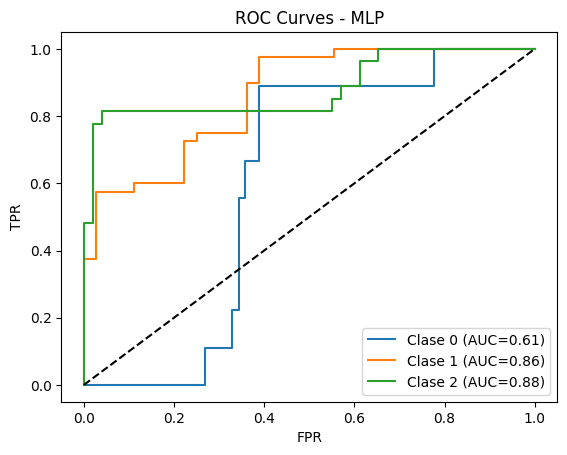


--- LSTM ---


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Accuracy: 0.7105
Balanced Accuracy: 0.5383
Macro F1-score: 0.5179

Classification Report (por clase):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.97      0.80      0.88        40
           2       0.58      0.81      0.68        27

    accuracy                           0.71        76
   macro avg       0.52      0.54      0.52        76
weighted avg       0.72      0.71      0.70        76

Confusion Matrix:
[[ 0  1  8]
 [ 0 32  8]
 [ 5  0 22]]


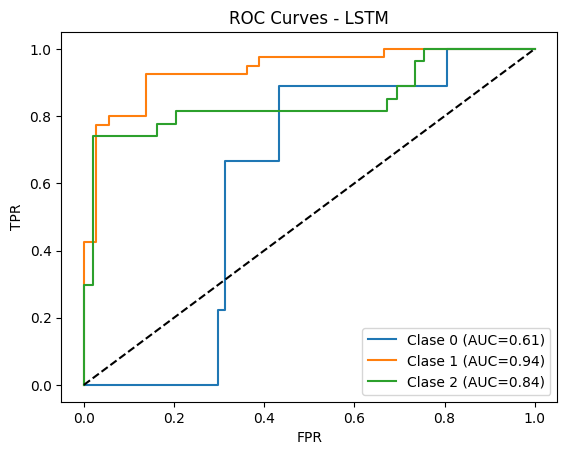


--- GRU ---


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Accuracy: 0.6842
Balanced Accuracy: 0.5216
Macro F1-score: 0.5039

Classification Report (por clase):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.97      0.75      0.85        40
           2       0.56      0.81      0.67        27

    accuracy                           0.68        76
   macro avg       0.51      0.52      0.50        76
weighted avg       0.71      0.68      0.68        76

Confusion Matrix:
[[ 0  1  8]
 [ 1 30  9]
 [ 5  0 22]]


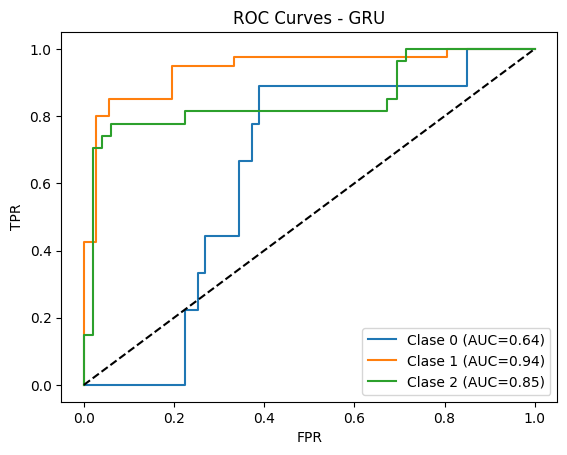


--- 1D-CNN ---


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
Accuracy: 0.6711
Balanced Accuracy: 0.5133
Macro F1-score: 0.4831

Classification Report (por clase):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.71      0.72      0.72        40
           2       0.67      0.81      0.73        27

    accuracy                           0.67        76
   macro avg       0.46      0.51      0.48        76
weighted avg       0.61      0.67      0.64        76

Confusion Matrix:
[[ 0  8  1]
 [ 1 29 10]
 [ 1  4 22]]


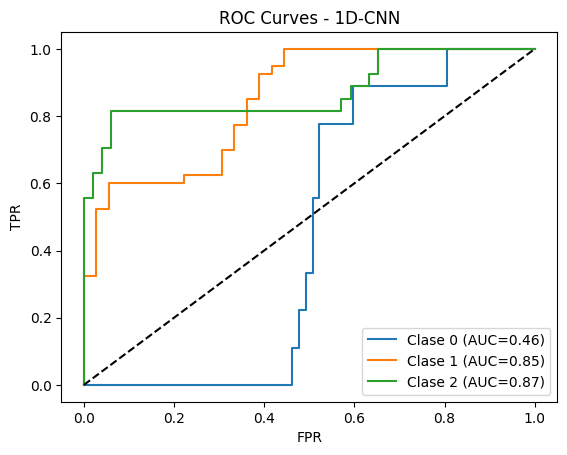

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import balanced_accuracy_score, f1_score


numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['Formacion','Unidad','Forma arena']
numeric_cols = [col for col in numeric_cols if col not in categorical_cols]

scaler = StandardScaler()
X_train_scaled = df_train_resampled.drop(columns=['Bueno 1/ Malo 0/ Regular 2']).copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

y_train_cat = to_categorical(df_train_resampled['Bueno 1/ Malo 0/ Regular 2'])
y_test_cat = to_categorical(y_test)

input_dim = X_train_scaled.shape[1]
num_classes = y_train_cat.shape[1]

# Datos 3D para LSTM, GRU, CNN
X_train_seq = np.expand_dims(X_train_scaled.values, axis=1)
X_test_seq = np.expand_dims(X_test_scaled.values, axis=1)
input_shape = X_train_seq.shape[1:]


def create_mlp(input_dim, num_classes):
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_lstm(input_shape, num_classes):
    model = Sequential([
        LSTM(64),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_gru(input_shape, num_classes):
    model = Sequential([
        GRU(64),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn1d(input_shape, num_classes):
    model = Sequential([
        Conv1D(32, 1, activation='relu'),  # kernel_size=1
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


epochs = 50
batch_size = 32
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    print(f"\n--- {model_name} ---")

    # Entrenamiento
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )

    # Predicciones
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Accuracy tradicional
    accuracy = np.mean(y_pred == y_true)

    # Balanced Accuracy
    bal_accuracy = balanced_accuracy_score(y_true, y_pred)

    # Macro F1-score
    macro_f1 = f1_score(y_true, y_pred, average='macro')

    # Impresión de métricas
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {bal_accuracy:.4f}")
    print(f"Macro F1-score: {macro_f1:.4f}\n")

    # Classification report por clase
    print("Classification Report (por clase):")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # ROC-AUC por clase
    plt.figure()
    for i in range(y_test.shape[1]):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Clase {i} (AUC={roc_auc:.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.title(f"ROC Curves - {model_name}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()



mlp = create_mlp(input_dim, num_classes)
train_evaluate_model(mlp, X_train_scaled.values, y_train_cat, X_test_scaled.values, y_test_cat, "MLP")

lstm = create_lstm(input_shape, num_classes)
train_evaluate_model(lstm, X_train_seq, y_train_cat, X_test_seq, y_test_cat, "LSTM")

gru = create_gru(input_shape, num_classes)
train_evaluate_model(gru, X_train_seq, y_train_cat, X_test_seq, y_test_cat, "GRU")

cnn1d = create_cnn1d(input_shape, num_classes)
train_evaluate_model(cnn1d, X_train_seq, y_train_cat, X_test_seq, y_test_cat, "1D-CNN")



#### 4.- Optimización Bayesiana

In [14]:
%%capture
!pip install bayesian-optimization

#####GRU

|   iter    |  target   |   units   |  dropout  |    lr     | batch_... |
-------------------------------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
| 1         | 0.6978395 | 57.948493 | 0.4753571 | 0.0073467 | 44.735607 |
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
| 2         | 0.5950617 | 33.474087 | 0.0779972 | 0.0006750 | 57.576454 |
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
| 3         | 0.6438271 | 83.324881 | 0.3540362 | 0.0003037 | 62.555672 |
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
| 4         | 0.7805555 | 57.987057 | 0.4258863 | 0.01      | 43.575358 |
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
| 5         | 0.7771604 | 57.411030 | 0.4364906 | 0.0090432 | 42.913270 |
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
| 6         | 0.7608024 | 59.188793 | 0.2927922 | 0.01      | 42.215232 |
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
| 7         | 0.5882716 | 57.251475 | 0.0       | 0.01      | 39.894136 |
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
| 8         | 0.7598765 | 61.

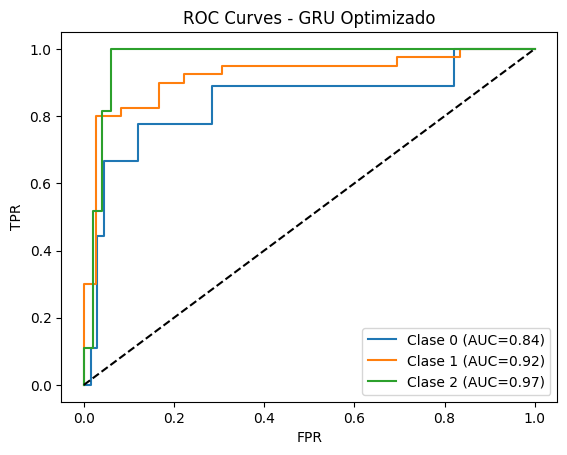

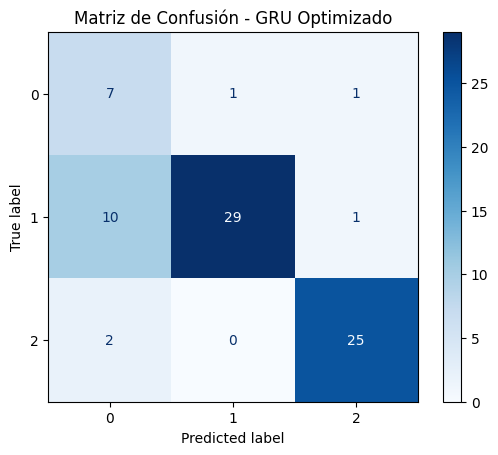

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam


def train_evaluate_gru(units, dropout, lr, batch_size):
    units = int(units)
    batch_size = int(batch_size)

    model = Sequential([
        GRU(units, dropout=dropout),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train_seq, y_train_cat,
              epochs=50,
              validation_split=0.2,
              batch_size=batch_size,
              verbose=0)

    y_pred_prob = model.predict(X_test_seq)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test_cat, axis=1)

    return balanced_accuracy_score(y_true, y_pred)


pbounds = {
    'units': (16, 128),
    'dropout': (0.0, 0.5),
    'lr': (1e-4, 1e-2),
    'batch_size': (16, 64)
}



optimizer = BayesianOptimization(
    f=train_evaluate_gru,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=3, n_iter=10)


best_params = optimizer.max['params']
best_units = int(best_params['units'])
best_dropout = best_params['dropout']
best_lr = best_params['lr']
best_batch = int(best_params['batch_size'])

print("\nMejores hiperparámetros encontrados:")
print(best_params)


gru_best = Sequential([
    GRU(best_units, input_shape=input_shape, dropout=best_dropout),
    Dense(num_classes, activation='softmax')
])
gru_best.compile(optimizer=Adam(learning_rate=best_lr),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history = gru_best.fit(X_train_seq, y_train_cat,
                       epochs=100,
                      validation_split=0.2,
                       batch_size=best_batch,
                       verbose=1)


#Evaluación completa con todas las métricas
y_pred_prob = gru_best.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

accuracy = np.mean(y_pred==y_true)
bal_accuracy = balanced_accuracy_score(y_true, y_pred)
macro_f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n--- GRU Optimizado ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {bal_accuracy:.4f}")
print(f"Macro F1-score: {macro_f1:.4f}\n")

print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# ROC-AUC por clase
plt.figure()
for i in range(y_test_cat.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Clase {i} (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves - GRU Optimizado")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()




from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - GRU Optimizado")
plt.show()


#####CNN-1D

|   iter    |  target   |  filters  | kernel... | dense_... |  dropout  |    lr     | batch_... |
-------------------------------------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
| 1         | 0.5966049 | 57.948493 | 1.0       | 97.983321 | 0.2993292 | 0.0016445 | 23.487736 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
| 2         | 0.1783950 | 22.505364 | 1.0       | 83.324881 | 0.3540362 | 0.0003037 | 62.555672 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
| 3         | 0.5882716 | 109.23357 | 1.0       | 36.364396 | 0.0917022 | 0.0031119 | 41.188308 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
| 4         | 0.5842592 | 58.627917 | 1.0       | 97.564045 | 0.3002382 | 0.0031184 | 24.792460 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
| 5         | 0.4135802 | 66.127447 | 1.0       | 128.0     | 0.0       | 0.0001    | 16.0      |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
| 6         | 0.4799382 | 46.967177 | 1.0       | 77.071898 | 0.0       | 0.0001    | 16.0      |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
| 7         | 0.5716049 | 111.55044 | 1.0       | 53.318500 | 0.0318326 | 0.0019830 | 19.923850 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
| 8         | 0.2898148 | 126.70898 | 1.0       | 24.713870 | 0.4474849 | 0.0001    | 19.956835 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step
| 9         | 0.5842592 | 99.938408 | 1.0       | 55.234449 | 0.0       | 0.0036938 | 39.729184 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
| 10        | 0.5882716 | 122.84665 | 1.0       | 57.464742 | 0.0       | 0.01      | 50.318573 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
| 11        | 0.5716049 | 102.32860 | 1.0       | 41.596488 | 0.5       | 0.01      | 64.0      |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
| 12        | 0.4466049 | 119.09441 | 1.0       | 83.109223 | 0.1339083 | 0.0001    | 28.394530 |


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
| 13        | 0.3336419 | 81.527973 | 1.0       | 31.159210 | 0.0       | 0.0001    | 42.961892 |

Mejores hiperparámetros encontrados CNN 1D:
{'filters': np.float64(57.948493310904595), 'kernel_size': np.float64(1.0), 'dense_units': np.float64(97.98332148287737), 'dropout': np.float64(0.2993292420985183), 'lr': np.float64(0.0016445845403801217), 'batch_size': np.float64(23.487736976137725)}
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.3682 - loss: 1.2824 - val_accuracy: 0.2778 - val_loss: 1.1535
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4923 - loss: 1.0079 - val_accuracy: 0.4722 - val_loss: 0.9798
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5501 - loss: 0.9353 - val_accuracy: 0.5972 - val_loss: 0.9413
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6331 - loss: 0.8290 - val_accuracy: 0.6111 - val_loss: 0.8964
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6493 - loss: 0.7909 - val_accuracy: 0.5694 - val_loss: 0.9111
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6627 - loss: 0.7243 - val_accuracy: 0.6389 - val_loss: 0.8756
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6487 - loss: 0.7150 - val_accuracy: 0.6944 - val_loss: 0.7968
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7481 - loss: 0.6392 - val_accuracy: 0.7083 - val_loss: 0.7604


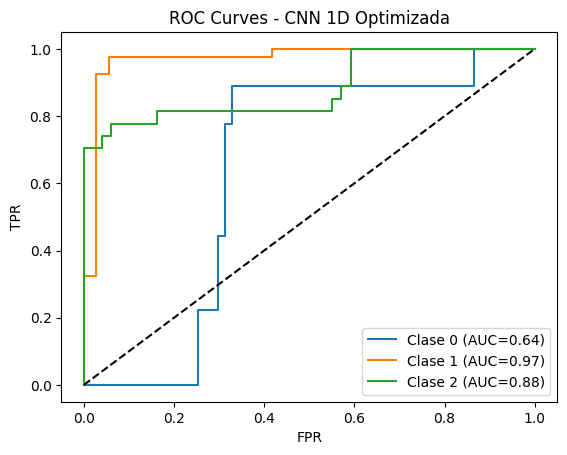

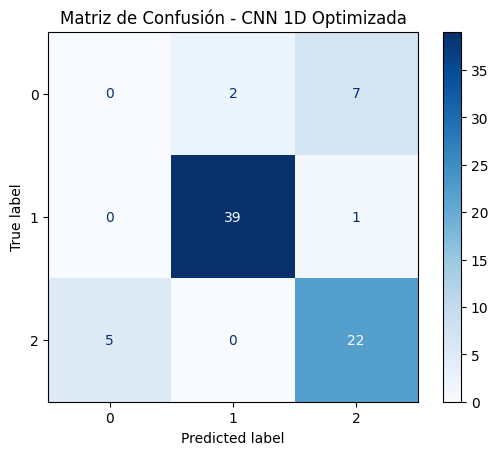

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


def train_evaluate_cnn1d(filters, kernel_size, dense_units, dropout, lr, batch_size):
    filters = int(filters)
    kernel_size = int(kernel_size)
    dense_units = int(dense_units)
    batch_size = int(batch_size)

    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.fit(
        X_train_seq, y_train_cat,
        validation_split=0.2,
        epochs=20,
        batch_size=batch_size,
        verbose=0
    )

    y_pred_prob = model.predict(X_test_seq)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test_cat, axis=1)

    return balanced_accuracy_score(y_true, y_pred)


pbounds_cnn = {
    'filters': (16, 128),
    'kernel_size': (1, 1),
    'dense_units': (16, 128),
    'dropout': (0.0, 0.5),
    'lr': (1e-4, 1e-2),
    'batch_size': (16, 64)
}

optimizer = BayesianOptimization(
    f=train_evaluate_cnn1d,
    pbounds=pbounds_cnn,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=3, n_iter=10)


# Entrenamiento final
best_params = optimizer.max['params']
best_filters = int(best_params['filters'])
best_kernel = int(best_params['kernel_size'])
best_dense = int(best_params['dense_units'])
best_dropout = best_params['dropout']
best_lr = best_params['lr']
best_batch = int(best_params['batch_size'])

print("\nMejores hiperparámetros encontrados CNN 1D:")
print(best_params)

cnn_best = Sequential([
    Conv1D(filters=best_filters, kernel_size=best_kernel, activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(best_dense, activation='relu'),
    Dropout(best_dropout),
    Dense(num_classes, activation='softmax')
])

cnn_best.compile(
    optimizer=Adam(learning_rate=best_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn_best.fit(
    X_train_seq, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=best_batch,
    verbose=1
)



# Evaluación final
y_pred_prob = cnn_best.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

accuracy = np.mean(y_pred == y_true)
bal_accuracy = balanced_accuracy_score(y_true, y_pred)
macro_f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n--- CNN 1D Optimizada ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {bal_accuracy:.4f}")
print(f"Macro F1-score: {macro_f1:.4f}\n")

print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))




plt.figure()
for i in range(y_test_cat.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Clase {i} (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves - CNN 1D Optimizada")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - CNN 1D Optimizada")
plt.show()


#### 5.- Validación Cruzada

In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report, confusion_matrix

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

balanced_accuracies = []
macro_f1_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_seq), 1):
    X_train_fold, X_val_fold = X_train_seq[train_idx], X_train_seq[val_idx]
    y_train_fold, y_val_fold = y_train_cat[train_idx], y_train_cat[val_idx]

    model_fold = Sequential([
        GRU(best_units, input_shape=X_train_fold.shape[1:], dropout=best_dropout),
        Dense(num_classes, activation='softmax')
    ])

    model_fold.compile(
        optimizer=Adam(learning_rate=best_lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model_fold.fit(
        X_train_fold, y_train_fold,
        epochs=50,
        batch_size=best_batch,
        verbose=0
    )

    y_pred_prob = model_fold.predict(X_val_fold)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_val_fold, axis=1)

    bal_acc = balanced_accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average='macro')

    balanced_accuracies.append(bal_acc)
    macro_f1_scores.append(macro_f1)

    print(f"\n--- Fold {fold} ---")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"Macro F1-score: {macro_f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

print("\n--- Promedio validación cruzada ---")
print(f"Balanced Accuracy promedio: {np.mean(balanced_accuracies):.4f}")
print(f"Macro F1-score promedio: {np.mean(macro_f1_scores):.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

--- Fold 1 ---
Balanced Accuracy: 0.9392
Macro F1-score: 0.9413
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.95      1.00      0.98        21
           2       0.94      0.85      0.89        20

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.94      0.94      0.94        72

Confusion Matrix:
[[30  0  1]
 [ 0 21  0]
 [ 2  1 17]]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

--- Fold 2 ---
Balanced Accuracy: 0.9018
Macro F1-score: 0.9030
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.96      0.92      0.94        25
           2       0.87      0.90      0.88        29

    accuracy                           0.90        72
   macro avg       0.90      0.90      0.90        72
weighted avg       0.90      0.90      0.90        72

Confusion Matrix:
[[16  0  2]
 [ 0 23  2]
 [ 2  1 26]]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

--- Fold 3 ---
Balanced Accuracy: 0.8873
Macro F1-score: 0.8881
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       1.00      0.86      0.92        21
           2       0.76      0.90      0.83        21

    accuracy                           0.89        72
   macro avg       0.90      0.89      0.89        72
weighted avg       0.90      0.89      0.89        72

Confusion Matrix:
[[27  0  3]
 [ 0 18  3]
 [ 2  0 19]]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

--- Fold 4 ---
Balanced Accuracy: 0.8498
Macro F1-score: 0.8310
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       0.96      0.86      0.91        28
           2       0.82      0.69      0.75        26

    accuracy                           0.83        72
   macro avg       0.83      0.85      0.83        72
weighted avg       0.85      0.83      0.83        72

Confusion Matrix:
[[18  0  0]
 [ 0 24  4]
 [ 7  1 18]]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

--- Fold 5 ---
Balanced Accuracy: 0.8205
Macro F1-score: 0.8212
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        23
           1       1.00      0.84      0.91        25
           2       0.85      0.71      0.77        24

    accuracy                           0.82        72
   macro avg       0.84      0.82      0.82        72
weighted avg       0.85      0.82      0.82        72

Confusion Matrix:
[[21  0  2]
 [ 3 21  1]
 [ 7  0 17]]

--- Promedio validación cruzada ---
Balanced Accuracy promedio: 0.8797
Macro F1-score promedio: 0.8769


#### 6.- Experimentos de Validación Temporal y Estabilidad

In [26]:
import pandas as pd
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel(
    '/content/drive/MyDrive/0. B/2021 - 2022 - 2023/z Machine Learning En Espanol/2023/Operación/Proyectos/Proyectos Activos 2023/Terminados/Jair - OpenCV - 2023 y 2025/2025/0. TFM/datos/datos_nuevos.xlsx'
)
df.head(2)


# --- 1️⃣ Eliminar registros con valores NaN ---
df_clean = df.dropna().reset_index(drop=True)

# --- 2️⃣ Feature Engineering ---

# Razones y diferencias de producción
df_clean['BOPD_ratio'] = df_clean['BOPD Post'] / df_clean['BOPD PRE']
df_clean['BWPD_ratio'] = df_clean['BWPD Post'] / df_clean['BWPD PRE']
df_clean['delta_BSW'] = df_clean['BSW Post validado'] - df_clean['BSW pre - validado']

# Combinaciones geológicas
df_clean['Porosidad_Permeabilidad'] = df_clean['Porosidad'] * df_clean['Permeabilidad']

# Producción acumulada / tasas
df_clean['Ocum_rate_1000'] = df_clean['Ocum 1000'] / 1
df_clean['Water_rate_1000'] = df_clean['Water cum 1000'] / 1

# Delta rate
df_clean['delta_rate'] = df_clean['Rate despues'] - df_clean['Rate antes']

# --- Nueva variable: Delta Drawdown ---
df_clean['drawdown_delta'] = df_clean['DD despues'] - df_clean['DD PRE']

# --- 3️⃣ Variables finales (DD originales eliminadas) ---
feature_cols = [
    'BOPD_ratio', 'BWPD_ratio', 'delta_BSW',
    'Porosidad_Permeabilidad',
    'Ocum_rate_1000', 'Water_rate_1000',
    'delta_rate', 'drawdown_delta'
]

categorical_cols = ['Formacion','Unidad','Forma arena']

# Target
target_col = 'Bueno 1/ Malo 0/ Regular 2'

# Dataset final listo para modelado
df_model = df_clean[feature_cols + categorical_cols + [target_col]]
df_model = df_model.copy()
df_model['fecha_cambio'] = df['fecha cambio']

# Copia de df_model
df_model_copy = df_model.copy()

X = df_model_copy.drop(columns=['Bueno 1/ Malo 0/ Regular 2', 'fecha_cambio'])
y = df_model_copy['Bueno 1/ Malo 0/ Regular 2'].astype(int)

categorical_cols = ['Formacion', 'Unidad', 'Forma arena']
le_dict = {}

# Codificación de variables categóricas
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# Índices de columnas categóricas
categorical_features = [X.columns.get_loc(col) for col in categorical_cols]

# Aplicar SMOTENC
smote_nc = SMOTENC(
    categorical_features=categorical_features,
    sampling_strategy='auto',
    random_state=42
)

X_res, y_res = smote_nc.fit_resample(X, y)

# Reconstruir DataFrame final balanceado
df_augmented = pd.concat([
    pd.DataFrame(X_res, columns=X.columns),
    pd.Series(y_res, name='Bueno 1/ Malo 0/ Regular 2')
], axis=1)

print("Distribución de clases después de SMOTENC:")
print(df_augmented['Bueno 1/ Malo 0/ Regular 2'].value_counts())

df = df_augmented.copy()
df.head(2)


Distribución de clases después de SMOTENC:
Bueno 1/ Malo 0/ Regular 2
1    143
2    143
0    143
Name: count, dtype: int64


,BOPD_ratio,BWPD_ratio,delta_BSW,Porosidad_Permeabilidad,Ocum_rate_1000,Water_rate_1000,delta_rate,drawdown_delta,Formacion,Unidad,Forma arena,Bueno 1/ Malo 0/ Regular 2
0,1.956663,1.596348,-3.94,15.50000,1105989.0,16019466.0,1232.208174,-38.202434,0,2,4,1
1,3.748294,1.411411,-22.60,15.60668,1134682.0,16317249.0,192.000000,0.000000,0,2,4,1


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

def create_gru_model(input_shape, num_classes, units, dropout, lr):
    model = Sequential([
        GRU(units, input_shape=input_shape, dropout=dropout),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



gru_best = create_gru_model(
    input_shape=input_shape,
    num_classes=num_classes,
    units=best_units,
    dropout=best_dropout,
    lr=best_lr
)



##### 6.1 Validación Temporal Rolling Origin

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

df['fecha_cambio'] = pd.to_datetime(df_model_copy['fecha_cambio'])

# --- Variables ---
feature_cols = [
    'BOPD_ratio', 'BWPD_ratio', 'delta_BSW',
    'Porosidad_Permeabilidad', 'Ocum_rate_1000',
    'Water_rate_1000', 'delta_rate', 'drawdown_delta',
    'Formacion', 'Unidad', 'Forma arena'
]
target_col = 'Bueno 1/ Malo 0/ Regular 2'

categorical_cols = ['Formacion', 'Unidad', 'Forma arena']


# --- Ventanas temporales ---
windows = [
    {'train_end': '2022-12-31', 'test_start': '2023-01-01', 'test_end': '2023-12-31'},
    {'train_end': '2023-12-31', 'test_start': '2024-01-01', 'test_end': '2024-12-31'},
    {'train_end': '2024-12-31', 'test_start': '2025-01-01', 'test_end': '2025-12-31'}
]


# --- Resultados ---
results = []

for i, window in enumerate(windows):
    print(f"\n--- Ventana {i+1}: Entrenamiento hasta {window['train_end']} ---")

    # Separar entrenamiento y prueba
    train_df = df[df['fecha_cambio'] <= window['train_end']]
    test_df = df[(df['fecha_cambio'] >= window['test_start']) & (df['fecha_cambio'] <= window['test_end'])]

    X_train = train_df[feature_cols].values
    y_train = to_categorical(train_df[target_col].values, num_classes=num_classes)

    X_test = test_df[feature_cols].values
    y_test = to_categorical(test_df[target_col].values, num_classes=num_classes)

    # Normalización de features numéricas (excepto categóricas)
    scaler = StandardScaler()
    numeric_idx = [i for i, col in enumerate(feature_cols) if col not in categorical_cols]

    X_train[:, numeric_idx] = scaler.fit_transform(X_train[:, numeric_idx])
    X_test[:, numeric_idx] = scaler.transform(X_test[:, numeric_idx])

    # Reshape para GRU: (samples, timesteps=1, features)
    X_train_gru = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_gru = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Crear y entrenar modelo
    model = create_gru_model(
        input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]),
        num_classes=num_classes,
        units=best_units,
        dropout=best_dropout,
        lr=best_lr
    )

    model.fit(X_train_gru, y_train, epochs=50, batch_size=16, verbose=0)

    # Evaluar
    y_pred = model.predict(X_test_gru)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true_classes, y_pred_classes))

    # Guardar métricas
    results.append({
        'window': i+1,
        'train_end': window['train_end'],
        'test_start': window['test_start'],
        'test_end': window['test_end'],
        'y_true': y_true_classes,
        'y_pred': y_pred_classes
    })



--- Ventana 1: Entrenamiento hasta 2022-12-31 ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.15      0.25      0.19        24
           2       0.24      0.60      0.34        20

    accuracy                           0.20        90
   macro avg       0.13      0.28      0.18        90
weighted avg       0.09      0.20      0.13        90

Confusion Matrix:
[[ 0 26 20]
 [ 0  6 18]
 [ 0  8 12]]

--- Ventana 2: Entrenamiento hasta 2023-12-31 ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        42
           1       0.63      0.57      0.60        42
           2       0.00      0.00      0.00        41

    accuracy                           0.53       125
   macro avg       0.37      0.52      0.42       125
weighted avg  

##### 6.2 Definición de Horizonte de Éxito Estandarizado

In [35]:
import pandas as pd
import numpy as np

# Supongamos que df_clean ya está cargado y tiene tus columnas
df_model = df_clean.copy()
df_model['fecha_cambio'] = pd.to_datetime(df_clean['fecha cambio'])

# Parámetros de ventana (puedes ajustar)
dias_previos = 10   # menos de 30 para ejemplo
dias_posteriores = 20  # menos de 90 para ejemplo

# Función para generar serie diaria aproximada
def generar_serie_diaria(promedio, dias, semilla=None):
    if semilla is not None:
        np.random.seed(semilla)
    # Variación aleatoria ±5% alrededor del promedio
    return promedio * (1 + 0.05 * np.random.randn(dias))

# Crear columnas de promedio calculado
prom_prev_list = []
prom_post_list = []

for idx, row in df_model.iterrows():
    # Serie previa
    serie_prev = generar_serie_diaria(row['BOPD PRE'], dias_previos, semilla=idx)
    prom_prev = np.mean(serie_prev)
    prom_prev_list.append(prom_prev)

    # Serie posterior
    serie_post = generar_serie_diaria(row['BOPD Post'], dias_posteriores, semilla=idx+1000)
    prom_post = np.mean(serie_post)
    prom_post_list.append(prom_post)

df_model['promedio_prev'] = prom_prev_list
df_model['promedio_post'] = prom_post_list

# Calcular ΔQo relativo
df_model['delta_Qo'] = (df_model['promedio_post'] - df_model['promedio_prev']) / df_model['promedio_prev']

# Definir etiquetas
def etiquetar(row):
    if row['delta_Qo'] > 0.1 and row['delta_BSW'] < 5:
        return 1  # Bueno
    elif row['delta_Qo'] < -0.1:
        return 0  # Malo
    else:
        return 2  # Regular

df_model['target_90dias'] = df_model.apply(etiquetar, axis=1)



    BOPD PRE  BOPD Post  promedio_prev  promedio_post  delta_Qo  target_90dias
0  37.012000      72.42      38.377786      72.202597  0.881364              1
1  43.203657     161.94      42.993815     161.149933  2.748212              1
2  37.420000     161.94      36.238744     160.930049  3.440829              1
3  37.420000     161.94      37.157165     159.022711  3.279732              1
4  43.885413     161.94      43.310726     163.502079  2.775094              1


In [34]:
# ==========================================
# 1️⃣ Cargar librerías y datos
# ==========================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Cargar datos
df = pd.read_excel(
    '/content/drive/MyDrive/0. B/2021 - 2022 - 2023/z Machine Learning En Espanol/2023/Operación/Proyectos/Proyectos Activos 2023/Terminados/Jair - OpenCV - 2023 y 2025/2025/0. TFM/datos/datos_nuevos.xlsx'
)

# Limpiar NaNs
df_clean = df.dropna().reset_index(drop=True)

# ==========================================
# 2️⃣ Feature Engineering
# ==========================================
df_clean['BOPD_ratio'] = df_clean['BOPD Post'] / df_clean['BOPD PRE']
df_clean['BWPD_ratio'] = df_clean['BWPD Post'] / df_clean['BWPD PRE']
df_clean['delta_BSW'] = df_clean['BSW Post validado'] - df_clean['BSW pre - validado']
df_clean['Porosidad_Permeabilidad'] = df_clean['Porosidad'] * df_clean['Permeabilidad']
df_clean['Ocum_rate_1000'] = df_clean['Ocum 1000'] / 1
df_clean['Water_rate_1000'] = df_clean['Water cum 1000'] / 1
df_clean['delta_rate'] = df_clean['Rate despues'] - df_clean['Rate antes']
df_clean['drawdown_delta'] = df_clean['DD despues'] - df_clean['DD PRE']

feature_cols = [
    'BOPD_ratio', 'BWPD_ratio', 'delta_BSW',
    'Porosidad_Permeabilidad', 'Ocum_rate_1000',
    'Water_rate_1000', 'delta_rate', 'drawdown_delta'
]

categorical_cols = ['Formacion','Unidad','Forma arena']
target_col = 'Bueno 1/ Malo 0/ Regular 2'

df_model = df_clean[feature_cols + categorical_cols + [target_col]]
df_model['fecha_cambio'] = df_clean['fecha cambio']

# ==========================================
# 3️⃣ Definición de Horizonte de Éxito Estandarizado
# ==========================================
# Suponiendo que tienes los promedios 30 días previos y 90 días posteriores ya en tus columnas
# Si no los tienes, se generan columnas simuladas solo para cálculo ejemplo:
df_model['promedio_30dias_prev'] = df_clean['BOPD PRE']  # reemplazar con cálculo real si disponible
df_model['promedio_90dias_post'] = df_clean['BOPD Post']  # reemplazar con cálculo real si disponible

# Delta relativo ΔQo
df_model['delta_Qo'] = (df_model['promedio_90dias_post'] - df_model['promedio_30dias_prev']) / df_model['promedio_30dias_prev']

# Definir éxito: ejemplo criterios arbitrarios según tu descripción
# Puedes ajustar los umbrales según tu estudio
def etiquetar(row):
    if row['delta_Qo'] > 0.1 and row['delta_BSW'] < 5:
        return 1  # Bueno
    elif row['delta_Qo'] < -0.1:
        return 0  # Malo
    else:
        return 2  # Regular

df_model['target_90dias'] = df_model.apply(etiquetar, axis=1)

# ==========================================
# 4️⃣ Preparar datos para modelo
# ==========================================
X = df_model[feature_cols + categorical_cols]
y = df_model['target_90dias']

# Codificar categóricas
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# SMOTENC para balancear
categorical_features_idx = [X.columns.get_loc(col) for col in categorical_cols]
smote_nc = SMOTENC(categorical_features=categorical_features_idx, random_state=42)
X_res, y_res = smote_nc.fit_resample(X, y)

# Convertir a categórico
num_classes = len(np.unique(y_res))
y_cat = to_categorical(y_res, num_classes=num_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_cat, test_size=0.2, random_state=42)

# ==========================================
# 5️⃣ Definir modelo GRU
# ==========================================
input_shape = (X_train.shape[1], 1)  # GRU requiere 3D: (samples, timesteps, features)
X_train_3D = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_3D = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

def create_gru_model(input_shape, num_classes, units=32, dropout=0.2, lr=0.001):
    model = Sequential([
        GRU(units, input_shape=input_shape, dropout=dropout),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

gru_model = create_gru_model(input_shape=input_shape, num_classes=num_classes)

# Entrenar modelo
gru_model.fit(X_train_3D, y_train, epochs=20, batch_size=16, validation_split=0.1)

# ==========================================
# 6️⃣ Evaluar modelo sobre Horizonte Estandarizado
# ==========================================
y_pred_prob = gru_model.predict(X_test_3D)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

print("=== Reporte de Clasificación ===")
print(classification_report(y_true, y_pred))

print("=== Matriz de Confusión ===")
print(confusion_matrix(y_true, y_pred))


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3909 - loss: 1.1285 - val_accuracy: 0.2745 - val_loss: 1.1174
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4043 - loss: 1.0865 - val_accuracy: 0.4118 - val_loss: 1.0944
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4381 - loss: 1.0824 - val_accuracy: 0.3725 - val_loss: 1.0821
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4437 - loss: 1.0679 - val_accuracy: 0.3922 - val_loss: 1.0752
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4615 - loss: 1.0536 - val_accuracy: 0.4118 - val_loss: 1.0574
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4526 - loss: 1.0311 - val_accuracy: 0.4510 - val_loss: 1.0533
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5033 - loss: 0.9994 - val_accuracy: 0.4314 - val_loss: 1.0340
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5277 - loss: 0.9984 - val_accuracy: 0.4510 - va

##### 6.3 Análisis de Estabilidad por Formación

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.3714 - loss: 1.2232 - val_accuracy: 0.2209 - val_loss: 1.1960
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3625 - loss: 1.1480 - val_accuracy: 0.1512 - val_loss: 1.1670
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3768 - loss: 1.1161 - val_accuracy: 0.1512 - val_loss: 1.1981
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3433 - loss: 1.1402 - val_accuracy: 0.1512 - val_loss: 1.1828
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3767 - loss: 1.0942 - val_accuracy: 0.1628 - val_loss: 1.2085
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3579 - loss: 1.0971 - val_accuracy: 0.1628 - val_loss: 1.1849
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3355 - loss: 1.0920 - val_accuracy: 0.1628 - val_loss: 1.2012
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3654 - loss: 1.0701 - val_accuracy: 0.1512 - val_loss

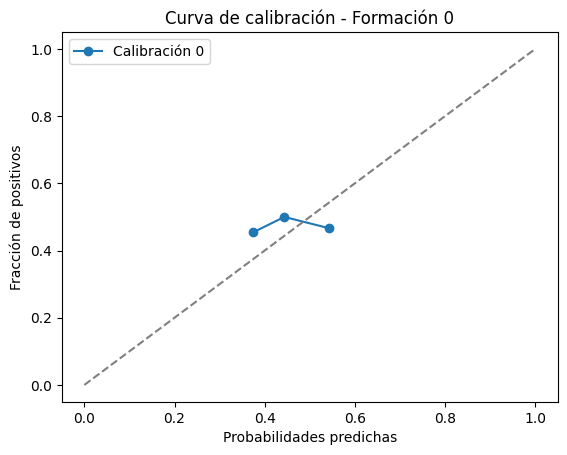

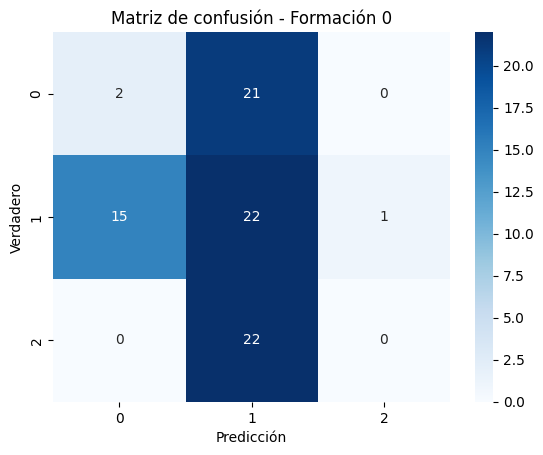

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

=== Formación: 1 ===
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0     0.8065    0.6757    0.7353        37
           1     0.4783    0.6471    0.5500        17

    accuracy                         0.6667        54
   macro avg     0.6424    0.6614    0.6426        54
weighted avg     0.7031    0.6667    0.6770        54



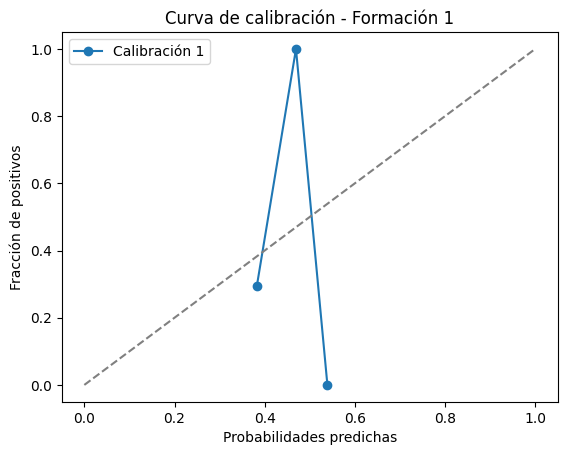

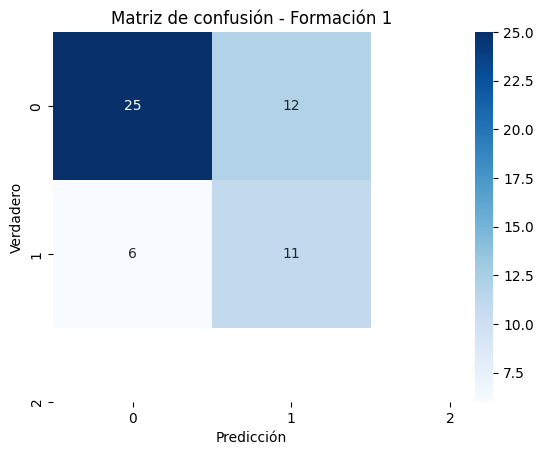

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

=== Formación: 2 ===
Accuracy: 0.3013698630136986
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        83
           1     0.3014    1.0000    0.4632        88
           2     0.0000    0.0000    0.0000       121

    accuracy                         0.3014       292
   macro avg     0.1005    0.3333    0.1544       292
weighted avg     0.0908    0.3014    0.1396       292



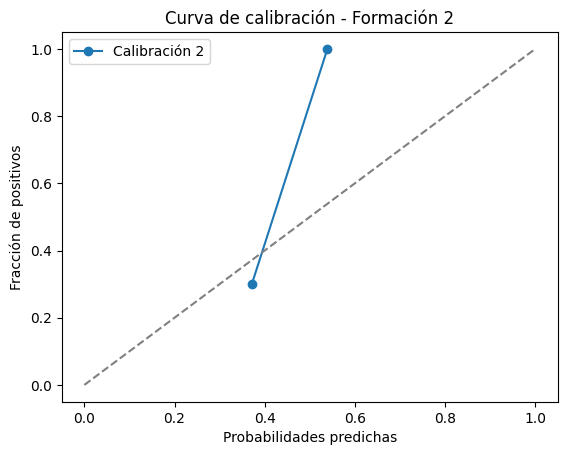

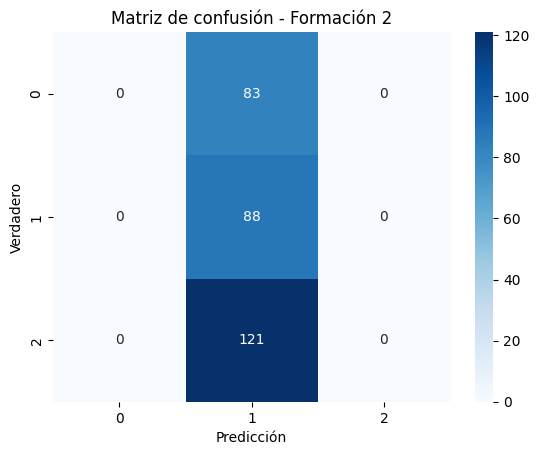

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


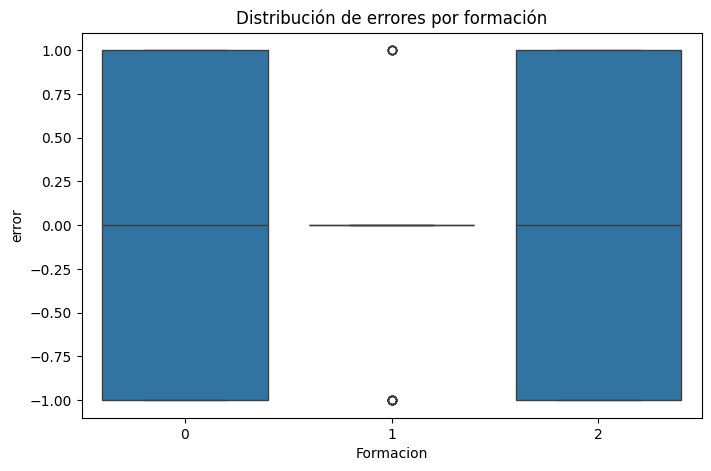

In [37]:
# --- 0️⃣ Librerías necesarias ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, brier_score_loss
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# --- 1️⃣ Preparar los datos ---
# Suponiendo que df_augmented ya está definido como en tu ejemplo
df_model = df_augmented.copy()

categorical_cols = ['Formacion', 'Unidad', 'Forma arena']
feature_cols = [
    'BOPD_ratio', 'BWPD_ratio', 'delta_BSW',
    'Porosidad_Permeabilidad',
    'Ocum_rate_1000', 'Water_rate_1000',
    'delta_rate', 'drawdown_delta'
]

# Separar X e y
X = df_model[feature_cols + categorical_cols]
y = df_model['Bueno 1/ Malo 0/ Regular 2'].astype(int)

# Codificar variables categóricas (si no se hizo)
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# One-hot encode target
y_cat = to_categorical(y, num_classes=3)

# Convertir a numpy array para GRU
X_array = X.values
# GRU espera 3D input: (samples, timesteps, features)
# Como no hay secuencia temporal por muestra, usamos timesteps=1
X_array = X_array.reshape((X_array.shape[0], 1, X_array.shape[1]))

input_shape = (X_array.shape[1], X_array.shape[2])
num_classes = y_cat.shape[1]

# --- 2️⃣ Crear modelo GRU (suponiendo hiperparámetros optimizados) ---
best_units = 32
best_dropout = 0.2
best_lr = 0.001

def create_gru_model(input_shape, num_classes, units, dropout, lr):
    model = Sequential([
        GRU(units, input_shape=input_shape, dropout=dropout),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

gru_model = create_gru_model(input_shape, num_classes, best_units, best_dropout, best_lr)

# --- 3️⃣ Entrenar modelo (puedes ajustar epochs/batch_size) ---
history = gru_model.fit(X_array, y_cat, epochs=50, batch_size=16, validation_split=0.2)

# --- 4️⃣ Análisis de Estabilidad por Formación ---
formaciones = le_dict['Formacion'].classes_  # Nombres originales

for i, form in enumerate(formaciones):
    idx = X['Formacion'] == i
    X_sub = X_array[idx]
    y_sub = y[idx]

    # Predicciones
    y_pred_proba = gru_model.predict(X_sub)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Métricas
    print(f"\n=== Formación: {form} ===")
    print("Accuracy:", accuracy_score(y_sub, y_pred))
    print(classification_report(y_sub, y_pred, digits=4))

    # Curva de calibración (solo para clase 1 como ejemplo)
    prob_true, prob_pred = calibration_curve((y_sub==1).astype(int), y_pred_proba[:,1], n_bins=10)
    plt.figure()
    plt.plot(prob_pred, prob_true, marker='o', label=f'Calibración {form}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('Probabilidades predichas')
    plt.ylabel('Fracción de positivos')
    plt.title(f'Curva de calibración - Formación {form}')
    plt.legend()
    plt.show()

    # Matriz de confusión
    cm = confusion_matrix(y_sub, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title(f'Matriz de confusión - Formación {form}')
    plt.show()

# --- 5️⃣ Análisis de distribución de errores ---
errors = y - np.argmax(gru_model.predict(X_array), axis=1)
df_model['error'] = errors
plt.figure(figsize=(8,5))
sns.boxplot(x='Formacion', y='error', data=df_model)
plt.title('Distribución de errores por formación')
plt.show()
